<a href="https://colab.research.google.com/github/haieng1234/Vechicle-Insurance-Prediction/blob/main/G6_Vehicle_Insurance_Claims_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title

### Vehicle Insurance Claims Prediction

# Members

1.	S2136282	HAI ENG CHONG
2.	S2181256	WAN AHMAD HAKEEMUD-DEEN BIN WAN ASMADI
3.	S2172650	LONGDI XIAN
4.	S2183273	QINGQING ZENG
5.	S2176584	JINYIN JIA
6.	S2148301	ALFIAN ROSI SAPUTRA

### Background

<p>Porto Seguro is the third largest Brazilian insurance provider, founded in 1945. The company offers car insurance, residential, health, life, business, and consortium and also provides auto and homeowners, pension, savings bonds, and other financial services. Porto Seguro is the leader in the auto and homeowner insurance segments in Brazil and has around 10 million customers across different business lines. </p>

<p>Vehicle insurance is a type of insurance that protects against the financial loss of the owner in the event of an accident, theft, or natural disaster. As every car is required by law to have car insurance, the amount of the claim can be enormous, depending on the market value of the vehicle.</p>


### Problem statement

<p> Auto owners are generally required to purchase auto insurance along with their cars, but auto insurance can be a significant expense. Especially for drivers who have been on the road for years and are experienced, it does not seem fair to spend so much money. Inaccurate forecasting of customer claims by auto insurance companies raises the cost of insurance for this segment of drivers while reducing the cost of insurance for bad drivers. Therefore, we need to build a model for predicting whether auto insurance policyholders will file insurance claims in the following year. A more accurate prediction would benefit the company (Porto Seguro is one of the largest auto insurance companies in Brazil) to make further adjustments to insurance prices in the future and hopefully get more auto drivers to buy auto insurance.</p>

### Objective

The aim of this project is to build a model for predicting whether an auto insurance policyholder will file an insurance claim in the following year. By providing accurate predictions, we can make further adjustments to the insurance rates. Eventually, increase the number of drivers who can afford vehicle insurance. 


### Method

## Building the models (suggested )
1. Creation of baseline models, XGBoost and LGB models respectively, using the PyCaret modelling tool.
2. Integration of the well-performing models using the Bagging, Boosting and Stack algorithms respectively.
3. Finally using the corresponding models in sklearn for a detailed tuning exploration exercise.

# CRISP-DM

**CRISP-DM consists of 6 stages：**

1) Business understanding: Explore what your organization expects to gain from data mining. 

2) Data understanding: Taking a closer look at the data available for mining.

3) Data preparation: Data preparation is one of the most important and often time-consuming aspects of data mining. In fact, it is estimated that data preparation usually takes 50-70% of a project's time and effort.

4) Modeling: Modeling is usually conducted in multiple iterations. Typically, data miners run several models using the default parameters and then fine-tune the parameters or revert to the data preparation phase for manipulations required by their model of choice. It is rare for an organization's data mining question to be answered satisfactorily with a single model and a single execution. 

5) Evaluation: the models built are technically correct and effective according to the data mining success criteria that you defined earlier. Evaluation of the results of your efforts using the business success criteria established at the beginning of the project. This is the key to ensuring that your organization can make use of the results you've obtained.

6) Deployment: A process of using your new insights to make improvements within your organization.

# Business Understanding

This project is based on a competition organized by the Kaggle platform in September 2017 - Porto Seguro's Safe Driver Prediction, which is hosted by Porto Seguro, the third largest insurance company in Brazil.

Dataset Source：https://www.kaggle.com/c/porto-seguro-safe-driver-prediction

# Data Understanding


<b>EDA target</b>

- The value of EDA mainly lies in being familiar with the data set, understanding the data set, and verifying the data set to determine that the obtained data set can be used for the next machine learning.
- After understanding the dataset, our next step is to understand the relationship between variables and the relationship between variables and predicted values.
- Guide data scientist in the steps of data processing and feature engineering, so that the structure and feature set of the data set make the next prediction problem more reliable.
- Complete the exploratory analysis of the data, and make some charts or text summaries of the data

**Brief Introduction**

1. Data overview: To do a preliminary exploration of the data, view the insight, field type, related statistics, etc.
 1. Data scale:
     - Training dataset size：595212rows, 59columns
     - Dataset Size：892816rows, 58columns
 2. feature classification
     - In the training set, the id column is the unique identification column, the target column is the label column, and there are 57 feature columns in total
     - Classify according to the characteristics of attribute
     - Sort by variable type
     - Organize the classified features into a table
 3. Descriptive statistics:
     - Use statistical attributes such as count, mean, std, min, max, etc. to get an overview of the data within each feature
2. data detection
     - Missing value distribution visualization and correlation analysis
     - Analyze the label column target, **data imbalance**
     - Correlation coefficient analysis
          1. The following features have a strong positive correlation:
             - ps_ind_12_bin & ps_ind_14 ——  0.89 
             - ps_reg_02 & ps_reg_03 ——  0.74 
          2. The following features have a strong positive correlation:
             - ps_car_12 & ps_car_13 ——  0.67 
             - ps_car_12 & ps_car_14 ——  0.6 
          3. The following characteristics have a strong negative correlation:
             - ps_ind_16_bin & ps_ind_18_bin ——  −0.6 
             - ps_ind_16_bin & ps_ind_17_bin ——  −0.52 
3. Feature analysis: separate mining of numerical features and categorical features, including various visualization techniques such as category skew, category distribution visualization, and numerical correlation
    - Two-category feature analysis and its relation with target：all the features of the calc name class have little effect on the target (the probability is equal).cal attribute is not helpful for the future prediction. 
    - Multi-category feature analysis and its relationship with target: **The vast majority of missing values ​​have a very large impact on the value of the target variable**, so it is considered a separate category in the feature engineering section
    - Continuous or sequential feature analysis: The features of approximately normal distribution and uniform distribution are all the features of the calc name class, while the value distribution of the ind, car, and reg features are imbalanced
4. Missing value handling
   1. all of the missing value in **cat** attribute set as -1 value.
   2. **ps_car_11** and **ps_car_12**: median imputation。
   3. **ps_reg_03** and **ps_car_14**: In order to retain the missing information of the missing values two additional column **ps_reg_03** and **ps_car_14** has been created. 1 indicates missing value while 0 indicates non missing value
5. Generate report using **Pandas-profiling** library

## Data overview

In order to get the understand the data pattern, head() and tail() function can be used to view the data with specific value, shape() function to fetch the dimensions of the data, describe() to computes a summary of statistics pertaining to the DataFrame columns and info() function to get a concise summary of the dataframe.

1.  Import libraries for data visualization and data analysis:
    - Data Analysis Libraries: pandas、numpy、scipy；
    - Visualization library: matplotlib、seabon；
2.  Load data：
    - Load training and test sets；
    - Brief observation data with head() and shape() functions；
3.  Data overview:
    - Use describe() to get description of the data in the DataFrame
    - info() method to prints information about the DataFrame

### Import data science and visualization libraries

In [ ]:
#coding:utf-8
#Import warning package to escape warning message
import warnings
warnings.filterwarnings('ignore')

#Get the diagram directly without the need of plt.show() execution
%matplotlib inline  

import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno # missing data handling

pylab.rcParams[ 'figure.figsize' ] = 16,9

In [ ]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Data retrieve
1. Missing value indicate as -1 value. 
2. Train.csv and Test.csv included from the dataset.

In [ ]:
train = pd.read_csv("train.csv", na_values=-1)
test = pd.read_csv("test.csv", na_values=-1)

FileNotFoundError: ignored

In [ ]:
# Randomly select 5 rows
train.sample(5)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
356437,890553,0,5,1.0,8,0.0,0.0,0,0,1,...,1,1,4,7,0,1,0,1,0,0
247030,616944,0,0,1.0,10,0.0,0.0,0,0,0,...,4,1,1,10,0,0,1,0,1,0
315139,787481,0,0,1.0,8,1.0,0.0,0,0,0,...,9,0,3,8,0,1,1,0,0,1
126428,316023,0,0,1.0,3,0.0,0.0,0,1,0,...,2,2,5,9,0,0,0,0,0,0
537495,1343319,0,1,2.0,3,1.0,0.0,1,0,0,...,7,0,4,9,0,0,0,1,0,0


In [ ]:
# Randomly select 5 rows
test.sample(5)

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
784483,1307934,7,1.0,3,0.0,0.0,0,0,1,0,...,5,1,1,10,0,0,1,1,0,0
682326,1137446,4,1.0,4,0.0,0.0,1,0,0,0,...,6,1,1,1,0,1,1,0,0,0
152061,253238,3,1.0,2,0.0,0.0,0,1,0,0,...,7,0,2,1,0,1,1,0,0,0
655261,1092460,1,1.0,5,0.0,3.0,0,0,0,1,...,7,2,1,6,0,1,1,0,1,0
299076,498647,0,3.0,8,0.0,0.0,0,1,0,0,...,7,1,5,10,1,0,0,1,0,0


### Dataset Size


**Training Dataset**

In [ ]:
print('Training dataset size：{} rows, {} columns.'.format(train.shape[0], train.shape[1]))

Training dataset size：595212 rows, 59 columns.


**Test Dataset**

In [ ]:
print('Test dataset size：{} rows, {} columns.'.format(test.shape[0], test.shape[1]))

Test dataset size：892816 rows, 58 columns.


### Dataset Concatenation
Combine train dataset and test dataset into one dataset

In [ ]:
def concat_df(train_data, test_data):   
    '''Merge the training data and test dataset exlude target column'''
    temp = pd.concat([train.iloc[:, 0], train.iloc[:, 2:]], axis=1)
    return pd.concat([temp, test_data], sort=True).reset_index(drop=True)

In [ ]:
data = concat_df(train, test)
print('Total Dataset Size：{} rows, {} columns.'.format(data.shape[0], data.shape[1]))

Total Dataset Size：1488028 rows, 58 columns.


In the subsequent EDA process, the merged **data** will be used for analysis.

### Feature Classification

In [ ]:
train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


All the column names of the training data set has been shown. According to the data description information provided as below:
1) `id` indicates as unique identifier column，`target` indicates as label column。

2) There has 57 attributes columns in total excluded `id` and `target` columns.

3) The structure of the attribute is standard with 4 levels of suffix seperated with _：

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;level 1 suffix: `ps` included in each of the attribute, no special meaning of it；

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;level 2 suffix: Each of the attribute `ind`, `reg`, `car`, `calc`indicate different attribute meaning. `ind` indicate driver related attribute，`reg` indicate region related attribute，`car` indicate car related attribute, `calc` indicate calculated value;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;level 3 suffix: sequential code;

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;level 4 suffix: `bin`and `cat` and without affix，referred to the type of the feature。`bin`indicate binary attribute, `cat`indicate multiple categorical variables and those attribute that without affix indicates as continuous or ordinal variable.

The attribute name can be used to classify according to the type of the attribute:

**Classification according to the characteristics of the attribute**

`ind` -- Driver related info

`reg` -- region related info

`car` -- Car related info

`calc` -- Other calculated or estimated info

In [ ]:
calc = []
car = []
ind = []
reg = []

for i in range(len(data.columns)):
    feature = train.columns[i]
    if feature.find('car') != -1:
        car.append(feature)
    elif feature.find('calc')!= -1:
        calc.append(feature)
    elif feature.find('ind')!= -1:
        ind.append(feature)
    elif feature.find('reg')!= -1:
        reg.append(feature)

**Sort by variable type**

`bin_` -- Binary variable

`cat` -- Multiple categorical variables

`cont` -- Continuous or ordinal variable

In [ ]:
bin_ = []
cat = []
cont = []

for i in range(len(data.columns)):
    feature = train.columns[i]
    if feature.find('bin') != -1:
        bin_.append(feature)
    elif feature.find('cat')!= -1:
        cat.append(feature)
    elif feature != 'target' and feature != 'id':
        cont.append(feature)

**Organize the classified features into a table**

In [ ]:
temp1 = pd.concat([
    pd.concat([pd.DataFrame(ind), pd.DataFrame(['ind']*len(ind)), pd.DataFrame(['Driver Related']*len(ind))], axis=1),
    pd.concat([pd.DataFrame(reg), pd.DataFrame(['reg']*len(reg)), pd.DataFrame(['Country Related']*len(reg))], axis=1),
    pd.concat([pd.DataFrame(car), pd.DataFrame(['car']*len(car)), pd.DataFrame(['Vechicle Related']*len(car))], axis=1),
    pd.concat([pd.DataFrame(calc), pd.DataFrame(['calc']*len(calc)), pd.DataFrame(['Estimated Total']*len(calc))], axis=1)
])
temp1.columns = ['Feature Name', 'Category', 'Features Description']

temp2 = pd.concat([
    pd.concat([pd.DataFrame(cat), pd.DataFrame(['cat']*len(cat)), pd.DataFrame(['multiple categorical variables']*len(cat))], axis=1),
    pd.concat([pd.DataFrame(bin_), pd.DataFrame(['bin']*len(bin_)), pd.DataFrame(['Binary variable']*len(bin_))], axis=1),
    pd.concat([pd.DataFrame(cont), pd.DataFrame(['No Suffix']*len(cont)), pd.DataFrame(['continuous or ordinal variable']*len(cont))], axis=1)
])
temp2.columns = ['Feature Name', 'Feature Suffix', 'Variable Type']
feature_list = pd.merge(temp1, temp2, on='Feature Name')

In [ ]:
feature_list

,Feature Name,Category,Features Description,Feature Suffix,Variable Type
0,ps_ind_01,ind,Driver Related,No Suffix,continuous or ordinal variable
1,ps_ind_02_cat,ind,Driver Related,cat,multiple categorical variables
2,ps_ind_03,ind,Driver Related,No Suffix,continuous or ordinal variable
3,ps_ind_04_cat,ind,Driver Related,cat,multiple categorical variables
4,ps_ind_05_cat,ind,Driver Related,cat,multiple categorical variables
5,ps_ind_06_bin,ind,Driver Related,bin,Binary variable
6,ps_ind_07_bin,ind,Driver Related,bin,Binary variable
7,ps_ind_08_bin,ind,Driver Related,bin,Binary variable
8,ps_ind_09_bin,ind,Driver Related,bin,Binary variable
9,ps_ind_10_bin,ind,Driver Related,bin,Binary variable


### Descriptive Statistics
Descriptive statistics can be used to understand the characteristics of the attribute. Statistical properties are:

- count: Count
- mean: Average
- std: Standard Deviation
- min: Minimum Value
- 25%: Upper Quartile
- 50%: Median
- 75%: Lower Quartile
- max: Maximum Value

In [ ]:
data.describe()

,id,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,...,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03
count,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,...,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.218572e+06
mean,7.440135e+05,4.496817e-01,4.501073e-01,4.499718e-01,2.371666e+00,1.885551e+00,7.688461e+00,3.008052e+00,9.225874e+00,2.338736e+00,...,9.401033e-03,1.002669e-03,1.241038e-02,7.298086e+00,6.606838e-01,1.206718e-01,1.543620e-01,6.110305e-01,4.395943e-01,8.945559e-01
std,4.295568e+05,2.872071e-01,2.871817e-01,2.872136e-01,1.117059e+00,1.136029e+00,1.333837e+00,1.414919e+00,1.460205e+00,1.247940e+00,...,9.650212e-02,3.164909e-02,1.273684e-01,3.543585e+00,4.734774e-01,3.257456e-01,3.612955e-01,2.876763e-01,4.045123e-01,3.457108e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.123724e-02
25%,3.720068e+05,2.000000e-01,2.000000e-01,2.000000e-01,2.000000e+00,1.000000e+00,7.000000e+00,2.000000e+00,8.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e-01,2.000000e-01,6.339361e-01
50%,7.440135e+05,4.000000e-01,5.000000e-01,5.000000e-01,2.000000e+00,2.000000e+00,8.000000e+00,3.000000e+00,9.000000e+00,2.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,7.000000e-01,3.000000e-01,8.023403e-01
75%,1.116020e+06,7.000000e-01,7.000000e-01,7.000000e-01,3.000000e+00,3.000000e+00,9.000000e+00,4.000000e+00,1.000000e+01,3.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,9.000000e-01,6.000000e-01,1.085415e+00
max,1.488027e+06,9.000000e-01,9.000000e-01,9.000000e-01,5.000000e+00,6.000000e+00,1.000000e+01,9.000000e+00,1.200000e+01,7.000000e+00,...,1.000000e+00,1.000000e+00,4.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e-01,1.800000e+00,4.423517e+00


According to the above descriptive statistics, number of statistical result columns is consistent with the number of attribute columns, indicating that the data sets are all numerical types.

### Data type

Data types of each attribute shown as below:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488028 entries, 0 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   id              1488028 non-null  int64  
 1   ps_calc_01      1488028 non-null  float64
 2   ps_calc_02      1488028 non-null  float64
 3   ps_calc_03      1488028 non-null  float64
 4   ps_calc_04      1488028 non-null  int64  
 5   ps_calc_05      1488028 non-null  int64  
 6   ps_calc_06      1488028 non-null  int64  
 7   ps_calc_07      1488028 non-null  int64  
 8   ps_calc_08      1488028 non-null  int64  
 9   ps_calc_09      1488028 non-null  int64  
 10  ps_calc_10      1488028 non-null  int64  
 11  ps_calc_11      1488028 non-null  int64  
 12  ps_calc_12      1488028 non-null  int64  
 13  ps_calc_13      1488028 non-null  int64  
 14  ps_calc_14      1488028 non-null  int64  
 15  ps_calc_15_bin  1488028 non-null  int64  
 16  ps_calc_16_bin  1488028 non-null  in

## Data Detection

### Missing value analysis

Analyse the data using isnull() function to find out the missing data in the dataset:

In [ ]:
data.isnull().any()[train.isnull().any()]

ps_car_01_cat    True
ps_car_02_cat    True
ps_car_03_cat    True
ps_car_05_cat    True
ps_car_07_cat    True
ps_car_09_cat    True
ps_car_11        True
ps_car_12        True
ps_car_14        True
ps_ind_02_cat    True
ps_ind_04_cat    True
ps_ind_05_cat    True
ps_reg_03        True
dtype: bool

**Missing value visualization**

In order to understand the pattern of missing data, missingno library by Aleksey Bilogur is used to plot the graph of missing data for analysis:

<AxesSubplot:>

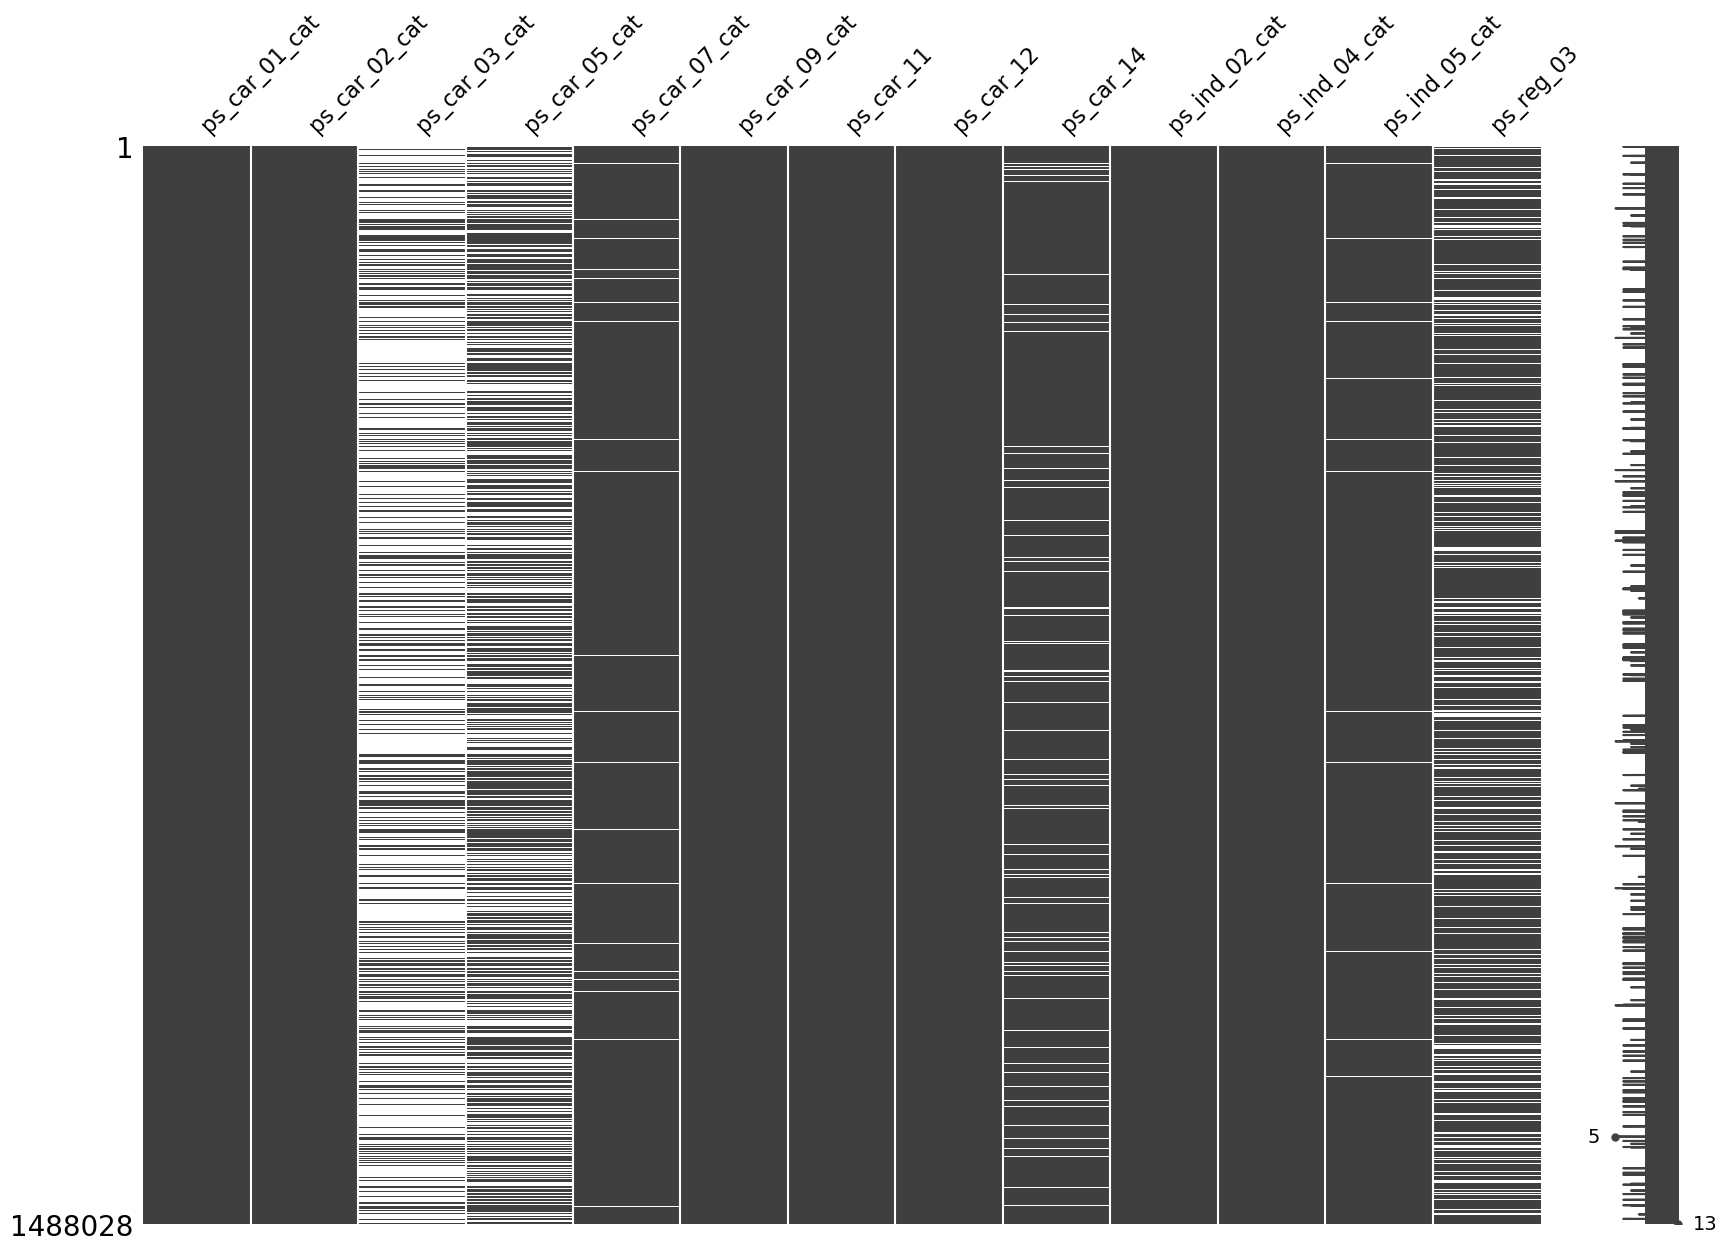

In [ ]:
import missingno as msno
col_missing = data.isna().any()[data.isna().any()].index
msno.matrix(df=data[col_missing], figsize=(20, 14))

As per the graph above, missing data attribute listed as below: <br>
**ps_ind_05_cat | ps_reg_03 | ps_car_03_cat | ps_car_05_cat | ps_car_07_cat | ps_car_09_cat | ps_car_14**


ps_car_01_cat    True
ps_car_02_cat    True
ps_car_03_cat    True
ps_car_05_cat    True
ps_car_07_cat    True
ps_car_09_cat    True
ps_car_11        True
ps_car_12        True
ps_car_14        True
ps_ind_02_cat    True
ps_ind_04_cat    True
ps_ind_05_cat    True
ps_reg_03        True

Total number of missing data as below：

In [ ]:
data[col_missing].apply(lambda c:len(c[c.isna()])).sort_values()

ps_car_12              1
ps_car_11              6
ps_car_02_cat         10
ps_ind_04_cat        228
ps_car_01_cat        267
ps_ind_02_cat        523
ps_car_09_cat       1446
ps_ind_05_cat      14519
ps_car_07_cat      28820
ps_car_14         106425
ps_reg_03         269456
ps_car_05_cat     666910
ps_car_03_cat    1028142
dtype: int64

In [ ]:
data.shape

(1488028, 58)

By visualizing and counting missing values, it can be found that the features with the most missing values are：**ps_car_03_cat**, missing data are around 1 million in total $\,70\,$%。<br>
**ps_car_05_cat** followed by **ps_reg_03**、**ps_car_14**、**ps_car_07_cat**、**ps_ind_05**, the rest of the attribute consists of small amount of missing data.

Most of the missing data are categorical variables whereby only few of the missing data are continuous or ordinal variables.

**Missing value correlation analysis**

Heatmap() function from the MissingNo library to draft a plot that shows the effects of missing data on the variables.

<AxesSubplot:>

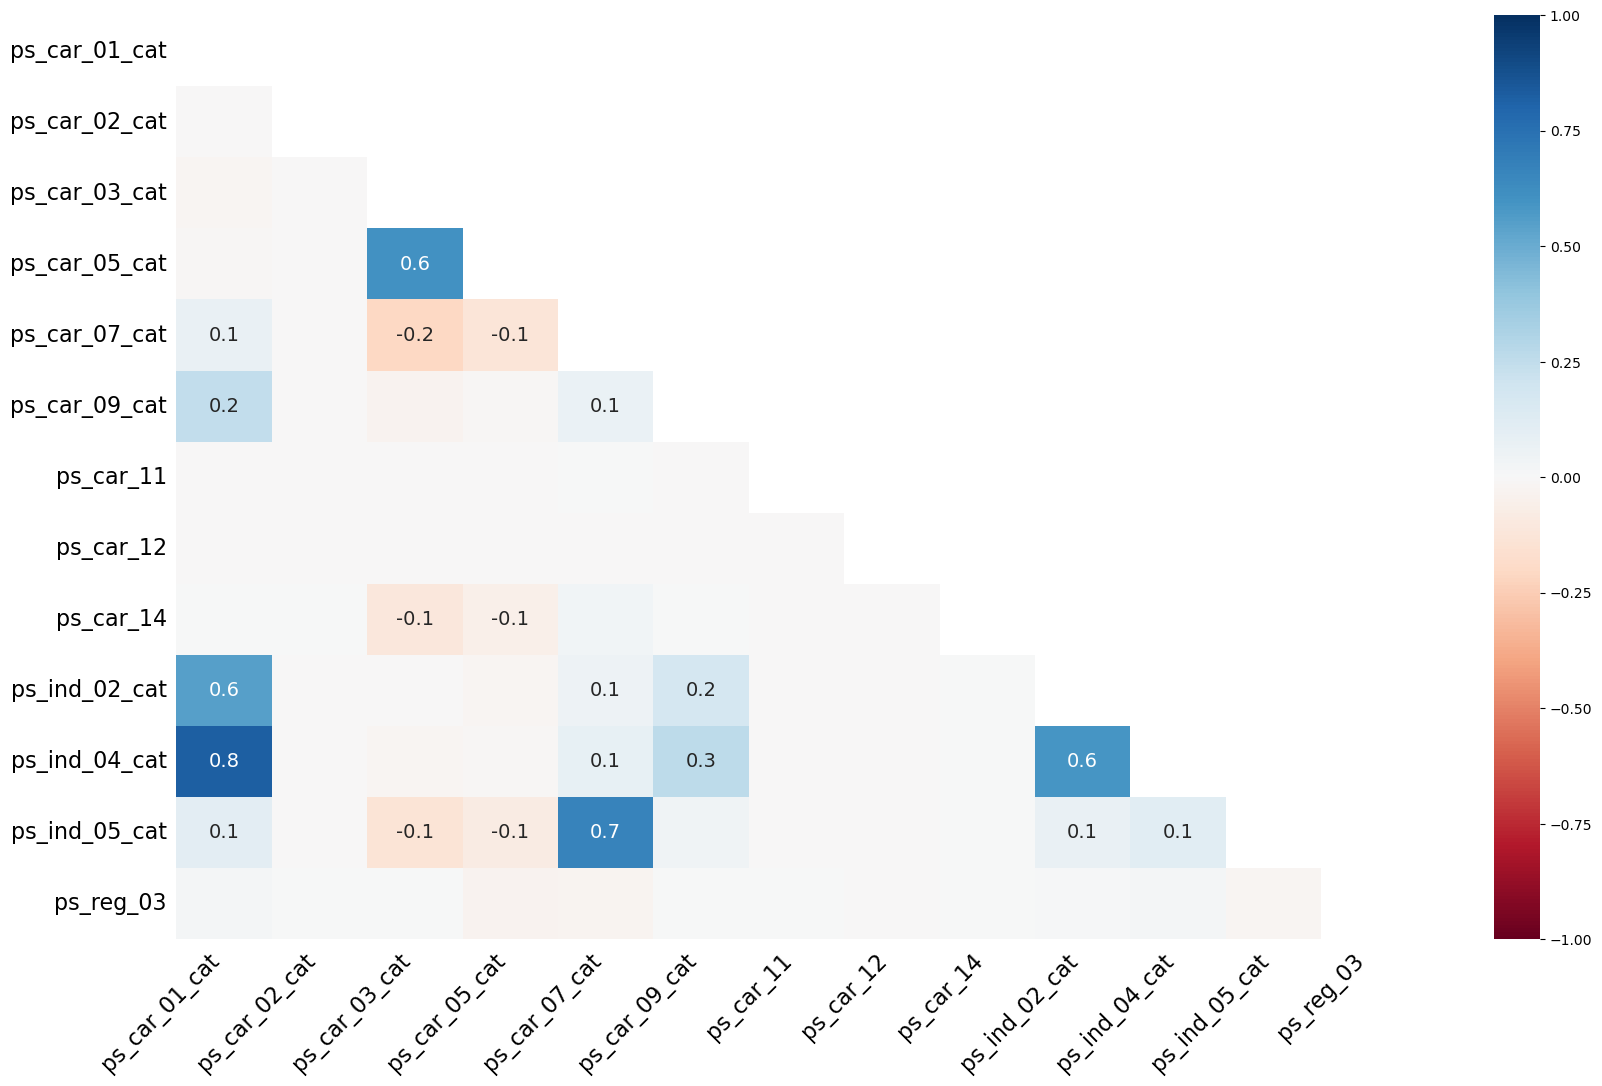

In [ ]:
msno.heatmap(df=data[col_missing])

The analysis of the figure above as below:

1) Strong relationship between the missing data of the following variable:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_car_01_cat** & **ps_ind_04_cat**&nbsp;——&nbsp;$0.8$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_car_07_cat** & **ps_ind_05_cat**&nbsp;——&nbsp;$0.7$<br>
&nbsp;&nbsp;&nbsp;&nbsp;It can be seen that there may be some correlation between features whose meanings belong to different categories.

2) Possible realationship between the missing data with the variable:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_car_01_cat** & **ps_ind_02_cat**&nbsp;——&nbsp;$0.6$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_car_03_cat** & **ps_car_05_cat**&nbsp;——&nbsp;$0.6$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_ind_02_cat** & **ps_ind_04_cat**&nbsp;——&nbsp;$0.6$<br>

### Target Analysis

The following analyzes the distribution of the target column:

In [ ]:
target = train['target']
target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

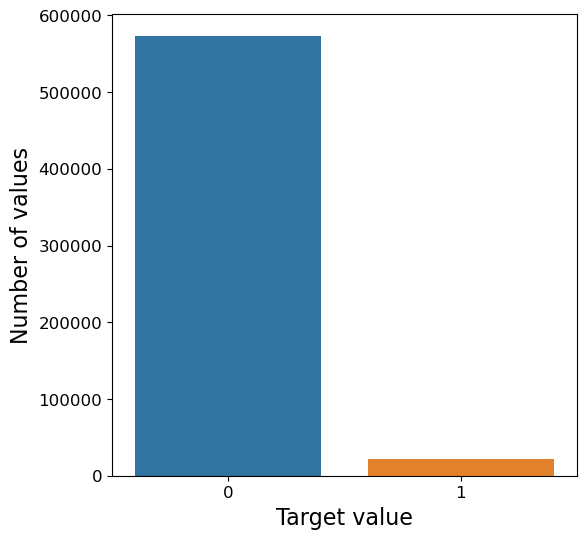

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
x = train['target'].value_counts().index.values
y = train['target'].value_counts().values

sns.barplot(ax=ax, x=x, y=y)
plt.ylabel('Number of values', fontsize=16)
plt.xlabel('Target value', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

During the process of analysis, the result has shows that there has a large amount of imbalance data in the `target` column in the training set. It is a major problem that need to solve in the following analysis.

In $\,595212\,$ data in the training set，there has $\,21694\,$data labeled as 1 and the rest of label is 0.

As per the result, training set data with the problem of imbalance data. 

We can undersample the records with target=0 and oversample the records with target=1; because it is a large dataset, we will undersample the records with target=0.

### Correlation coefficient analysis

In order to confirm whether there is correlation between features, we conduct correlation analysis on different types of attributes.

**(1)Correlation coefficient analysis of binary categorical variables, continuous or ordinal variable features**

<AxesSubplot:title={'center':'Pearson_bin&cont'}>

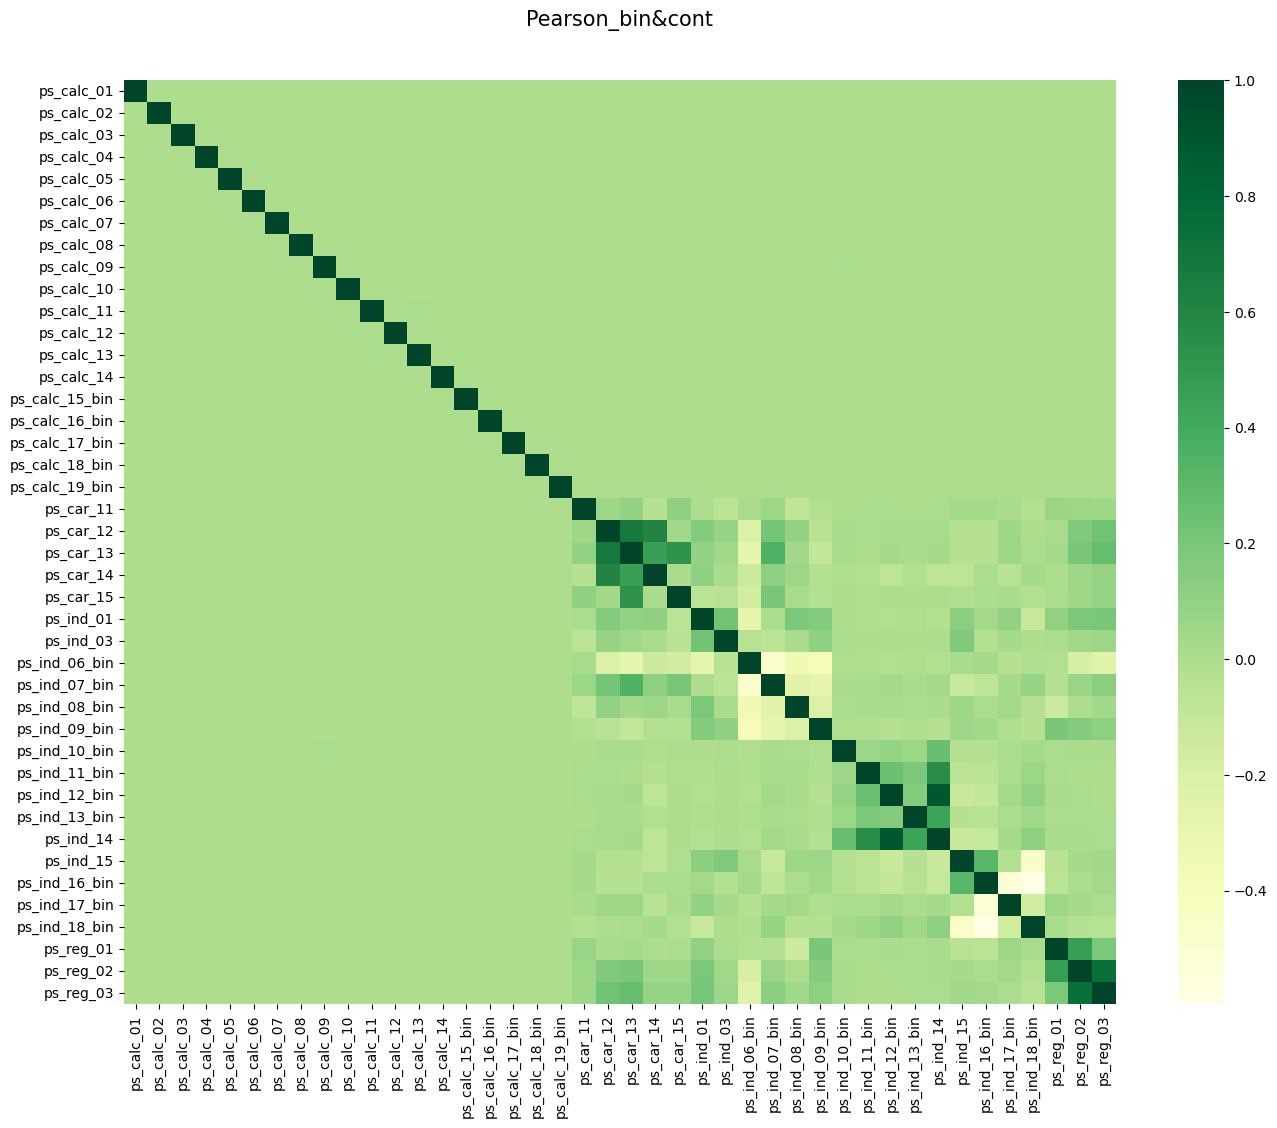

In [ ]:
cmap = plt.cm.YlGn
plt.figure(figsize=(16,12))
plt.title('Pearson_bin&cont', y=1.05, size=15)
sns.heatmap(data[np.sort(bin_+cont)].corr(), cmap=cmap)

According to the graph, analysis as below: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1) all of the `calc`attribute, there is almost no correlation with other characteristics；<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2) Strong linear correlations only exist between attribute belongs to the same prefix, and there is almost no correlation between attribute of different prefix types;<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3) Observe the part with more changes in the lower right corner of the correlation diagram, and you can find five regions with strong correlation。

Five areas are involved in feature association：<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. `car` Nominal continuous or ordinal variable features between 12 and 15;<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. `ind` continuous or ordinal variable between features 1 and 3;<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. `ind` binary variable with 10 to 13 and 14 for continuous or ordinal variables;<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4. `ind` binary variable between 16 and 18 and between 15 for continuous or ordinal variable characteristics;<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5. `reg` between class continuous or ordinal variable features.<br>

The correlation of these features will be analyzed below:

**Correlation coefficient analysis between continuous or ordinal variable features with car value**

<AxesSubplot:title={'center':'Pearson_car_bin&cont'}>

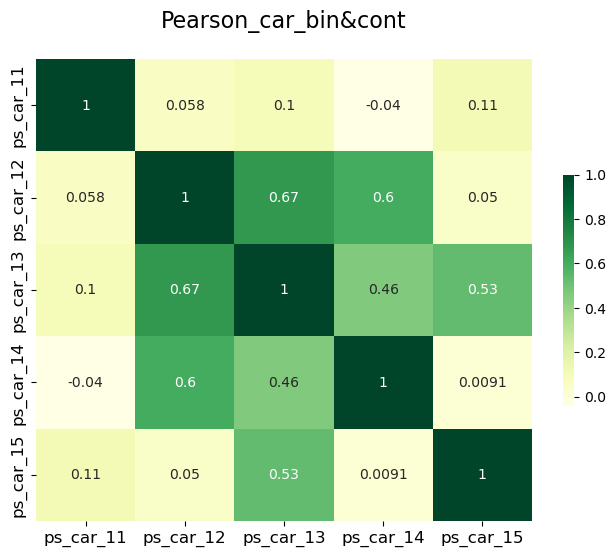

In [ ]:
cmap = plt.cm.YlGn
plt.figure(figsize=(8,6))
plt.title(u'Pearson_car_bin&cont', y=1.05, size=16)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.heatmap(data[np.intersect1d(car, cont)].corr(),cmap = cmap,cbar_kws={"shrink": .5}, annot=True)

The following attribute were found to have strong positive correlations:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_car_12** & **ps_car_13**&nbsp;——&nbsp;$0.67$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_car_12** & **ps_car_14**&nbsp;——&nbsp;$0.6$<br>

**ind relatedBinary, continuous, or ordinal variable characteristics**

In [ ]:
ind_bin_cont = np.union1d(np.intersect1d(ind, bin_), np.intersect1d(ind, cont))

<AxesSubplot:title={'center':'Pearson_ind_bin&cont'}>

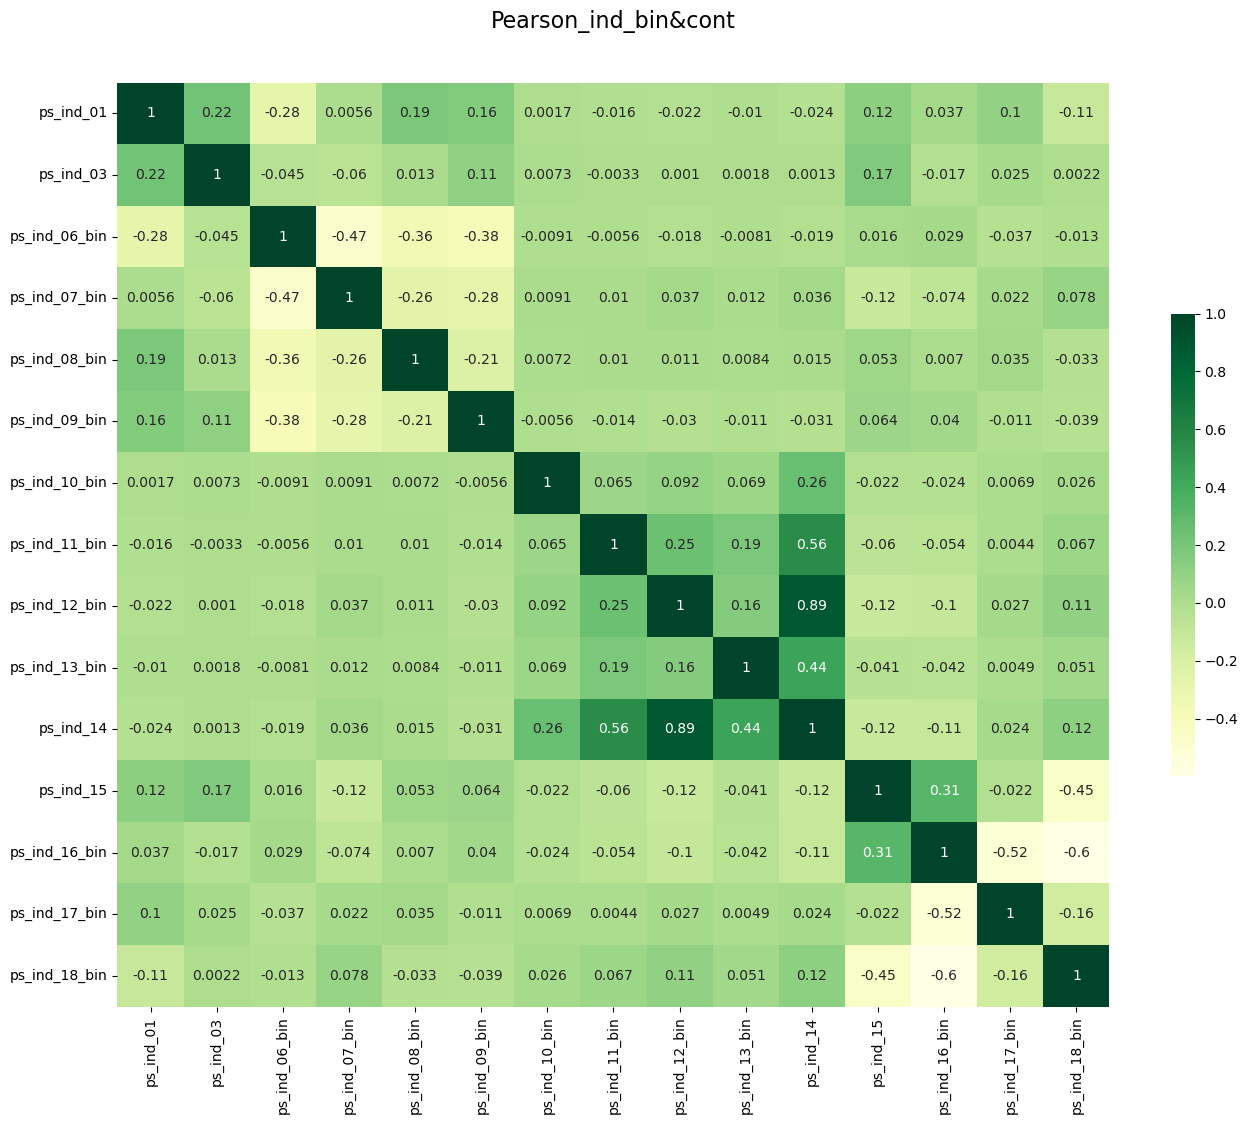

In [ ]:
cmap = plt.cm.YlGn
plt.figure(figsize=(16,12))
plt.title(u'Pearson_ind_bin&cont', y=1.05, size=16)
sns.heatmap(data[ind_bin_cont].corr(), cbar_kws={"shrink": .5}, cmap = cmap, annot=True)

The following features were found to have a strong positive correlation:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_ind_12_bin** & **ps_ind_14**&nbsp;——&nbsp;$0.89$<br>
The following features have a strong negative correlation:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_ind_16_bin** & **ps_ind_18_bin**&nbsp;——&nbsp;$(-0.6)$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_ind_16_bin** & **ps_ind_17_bin**&nbsp;——&nbsp;$(-0.52)$<br>

**reg related continuous or sequential variable features**

<AxesSubplot:title={'center':'Pearson_reg_bin&cont'}>

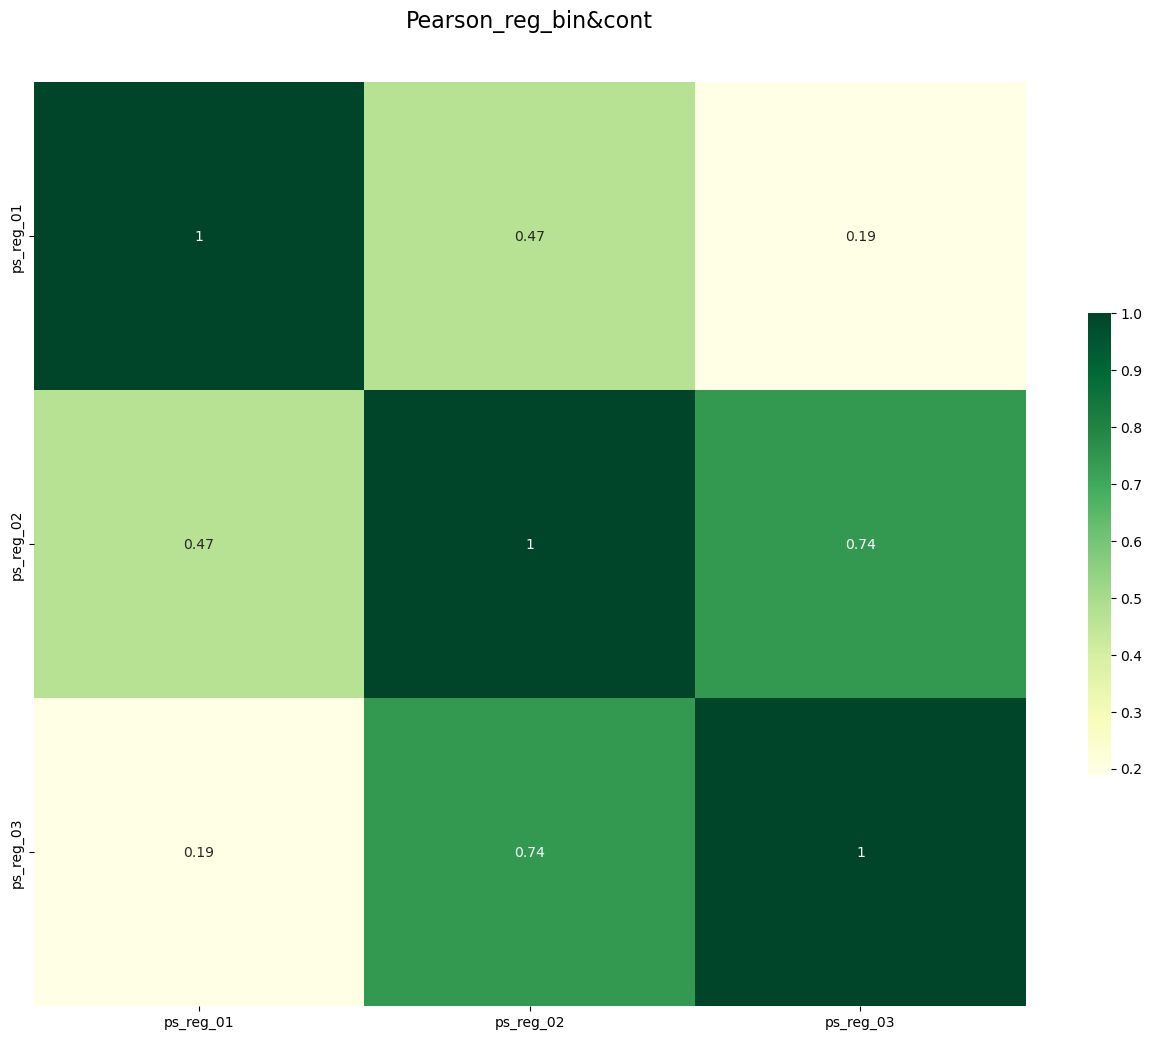

In [ ]:
cmap = plt.cm.YlGn
plt.figure(figsize=(16,12))
plt.title(u'Pearson_reg_bin&cont', y=1.05, size=16)
sns.heatmap(data[np.intersect1d(reg, cont)].corr(), cmap = cmap, cbar_kws={"shrink": .5}, annot=True)

The following features were found to have a strong positive correlation:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_reg_02** & **ps_reg_03**&nbsp;——&nbsp;$0.74$<br>

After analyzing the correlation coefficients of binary categorical variables, continuous or ordinal variable features, the multi-categorical variable features are also analyzed below.

**(2) Multi-categorical variable feature correlation coefficient analysis**

<AxesSubplot:title={'center':'Pearson_bin_other'}>

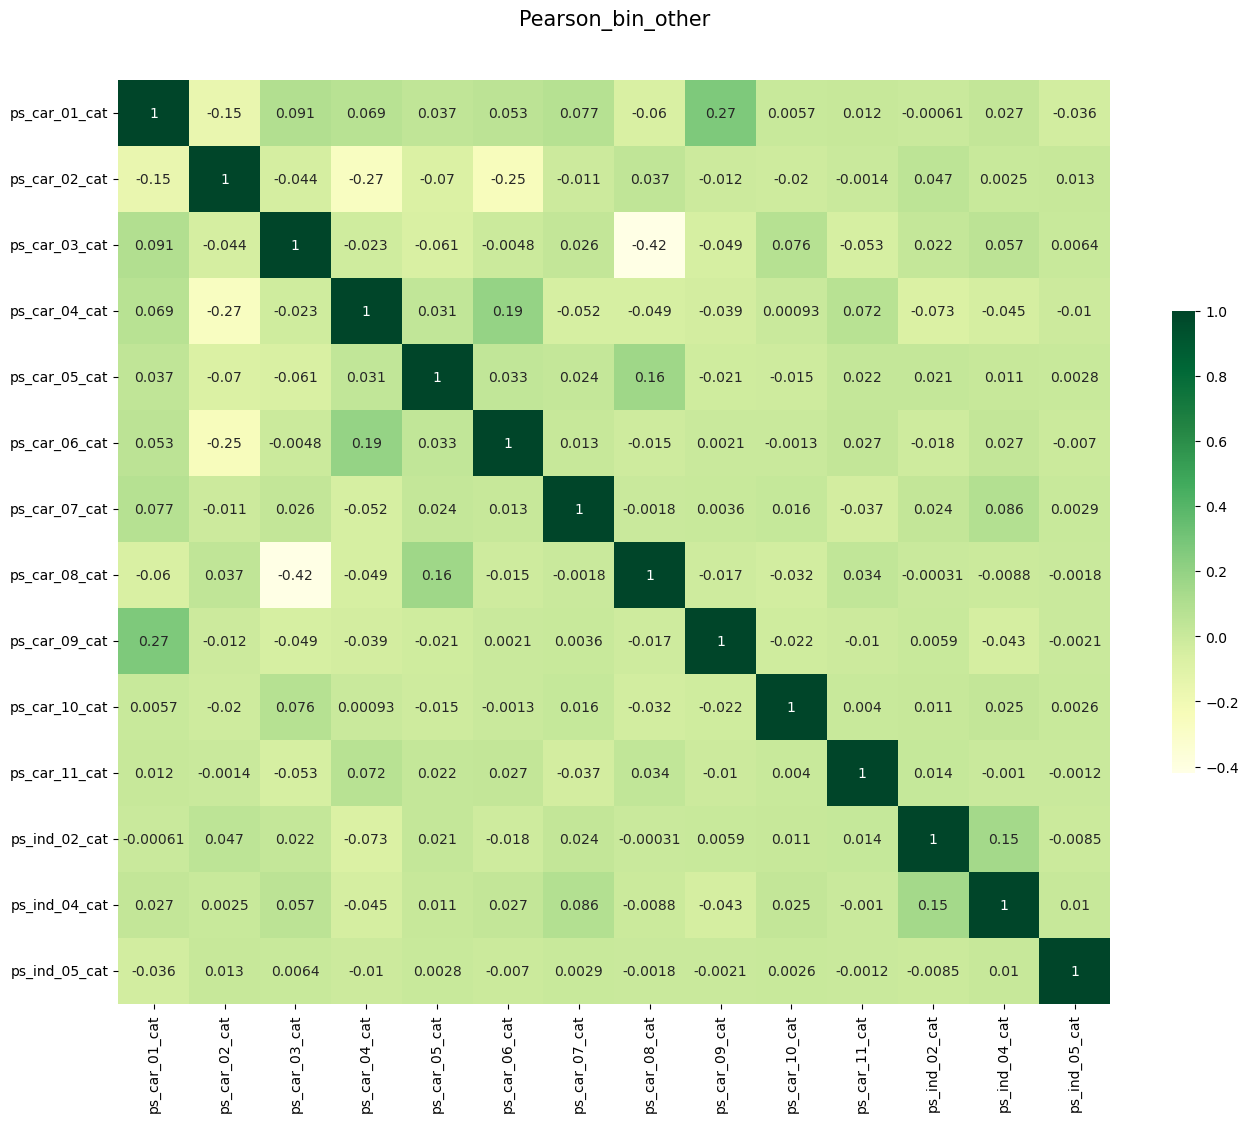

In [ ]:
cmap = plt.cm.YlGn
plt.figure(figsize=(16,12))
plt.title(u'Pearson_bin_other', y=1.05, size=15)
sns.heatmap(data[np.sort(cat)].corr(),cmap = cmap,cbar_kws={"shrink": .5}, annot=True)

No strong relationship was found between attribute of multiple categorical variable types

### Summary of correlation coefficient analysis

Strong positive correlation attribute:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_ind_12_bin** & **ps_ind_14**&nbsp;——&nbsp;$0.89$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_reg_02** & **ps_reg_03**&nbsp;——&nbsp;$0.74$<br>

Strong positive correlation attribute:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_car_12** & **ps_car_13**&nbsp;——&nbsp;$0.67$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_car_12** & **ps_car_14**&nbsp;——&nbsp;$0.6$<br>

Strong negative correlation attribute:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_ind_16_bin** & **ps_ind_18_bin**&nbsp;——&nbsp;$(-0.6)$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_ind_16_bin** & **ps_ind_17_bin**&nbsp;——&nbsp;$(-0.52)$<br>

## Characteristics Analysis

Then analyze the characteristics of each variable type

### Binary feature analysis

`bin` represented binary classification 

Since the value of the binary classification feature can only be 0 or 1, stacked bar chart will be used to observe the proportional distribution of the value of each binary classification variable

**Stacked bar chart to represent the value distribution of binary classification variables**

In [ ]:
# import plotly library 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly
##bin：
#stacked bar chart：
##Firstly，use bincol to get the value of 0,1 value and missing value
bin_zero_list = []
bin_one_list = []

for i in bin_:
    temp = data[i].value_counts()
    zero = temp[0]
    one = temp[1]
    nan = len(data) - zero - one
    bin_zero_list.append(zero)
    bin_one_list.append(one)

trace_1 = go.Bar(
        x = bin_,
        y = bin_zero_list,
        name = 'Zero Counts'
        )

trace_2 = go.Bar(
        x = bin_,
        y = bin_one_list,
        name = 'One Counts'
        )

bin_plot_data = [trace_1,trace_2]
layout = go.Layout(
        barmode = 'stack')

fig = go.Figure(data=bin_plot_data,layout = layout)
fig.show()

It can be found that the value distribution of almost all binary classification features are imbalanced as most of the binary classification attribute take the value of 0 far more than the value of 1.
And the following attribute, almost all of the value are 0 which is not helpful for discrimination analysis：<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_ind_10_bin**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_ind_11_bin**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_ind_12_bin**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_ind_13_bin**<br>
These attribute are not helpful for later predictions。

Combined with the results of the previous correlation coefficient analysis：
There is a strong positive correlation between **ps_ind_12_bin** & **ps_ind_14** (with the value of $0.89$)


In [ ]:
data.ps_ind_14.value_counts()

0    1472125
1      13707
2       1847
3        330
4         19
Name: ps_ind_14, dtype: int64

Most of the value of **ps_ind_14** are made up by 0 and have a strong correlation with some of the attribute. It is not meaningful for our analysis.

As per the result of the previous section, **ps_ind_16_bin**, **ps_calc_16_bin**, **ps_calc_17_bin** with the different trend than the other attributes which have the value of 1 more than 0. According to the previous correlation coefficient analysis, there is a negative correlation between **ps_ind_16** and **ps_ind_15** which consists of the opposite result.

**The relationship between the two classification variables and the target**

The figure below lists the probability that the label column `target` takes a value of 1 under the values ​​of 0 and 1 for each binary variable feature (taget=1 is the conditional probability of the value of each binary variable). <br>
Using conditional probability can effectively avoid the problem of data imbalance in the `target` column.


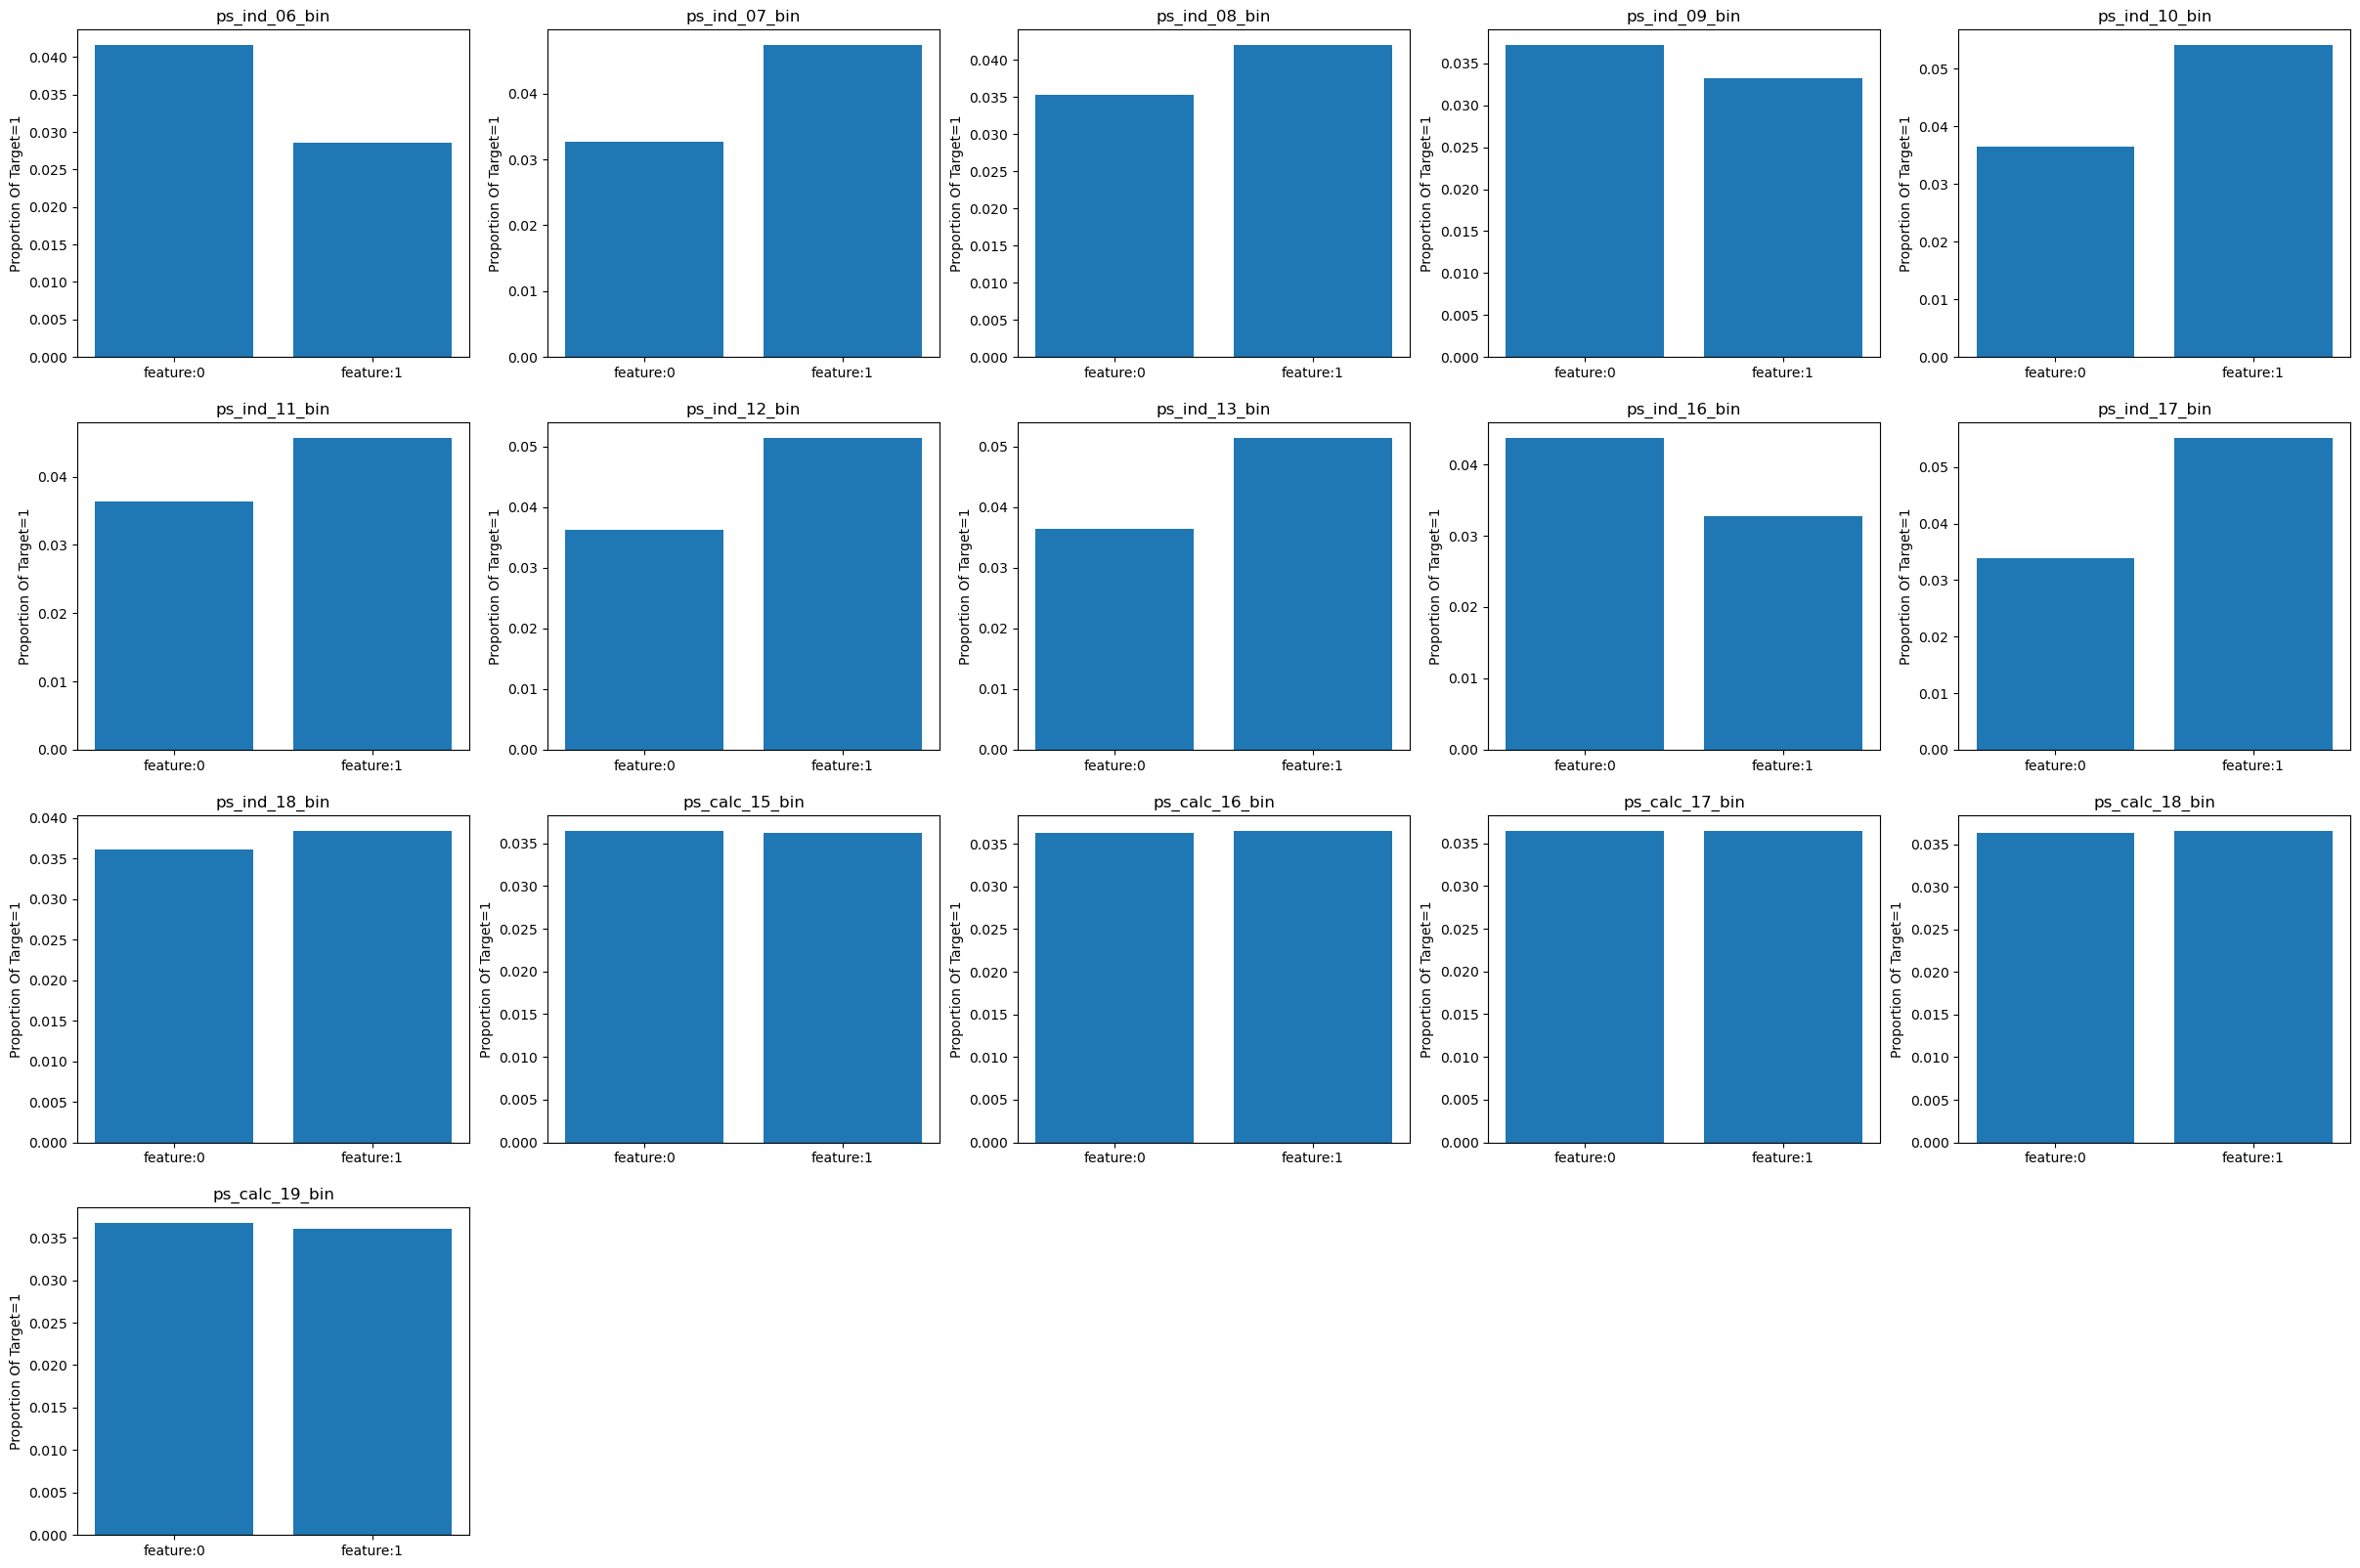

In [ ]:
train_1 = train[train.target==1]
train_0 = train[train.target==0]
len_train1 = len(train_1)
len_train0 = len(train_0)

k = 0
plt.figure(figsize=(30,20)) 
for x in bin_:
    k = k+1
    temp0 = train_0[x].value_counts()
    bin_zero_t0 = temp0[0]
    bin_one_t0 = temp0[1]
    temp1 = train_1[x].value_counts()
    bin_zero_t1 = temp1[0]
    bin_one_t1 = temp1[1]
    name_0 = 'feature:0'
    name_1 = 'feature:1'
    name = (name_0,name_1)
    #zerolist = (bin_zero_t0/(bin_zero_t0+bin_zero_t1),bin_one_t0/(bin_one_t0+bin_one_t1))
    onelist = (bin_zero_t1/(bin_zero_t0+bin_zero_t1),bin_one_t1/(bin_one_t0+bin_one_t1)) 
    plt.subplot(4, 5, k)
    plt.ylabel('Proportion Of Target=1')
    plt.title(x)
    #plt.bar(name,zerolist,color = 'red',width = 0.8,label = 'target:zero')
    plt.bar(name,onelist,width = 0.8,label = 'target:one')

As per the analysis, all of the `calc` value has no influednce on `target` value (with equal value). As per the result with the previous analysis, `calc` value are not helpful for prediction.

### Multi-Class Feature Analysis

Multi-category features for `cat`<br>

Due to the missing value in some of the value, hence missing value will be remain for the analysis.

The following bar charts describe the distribution of different values ​​​​of each multi-classification feature in the data set:

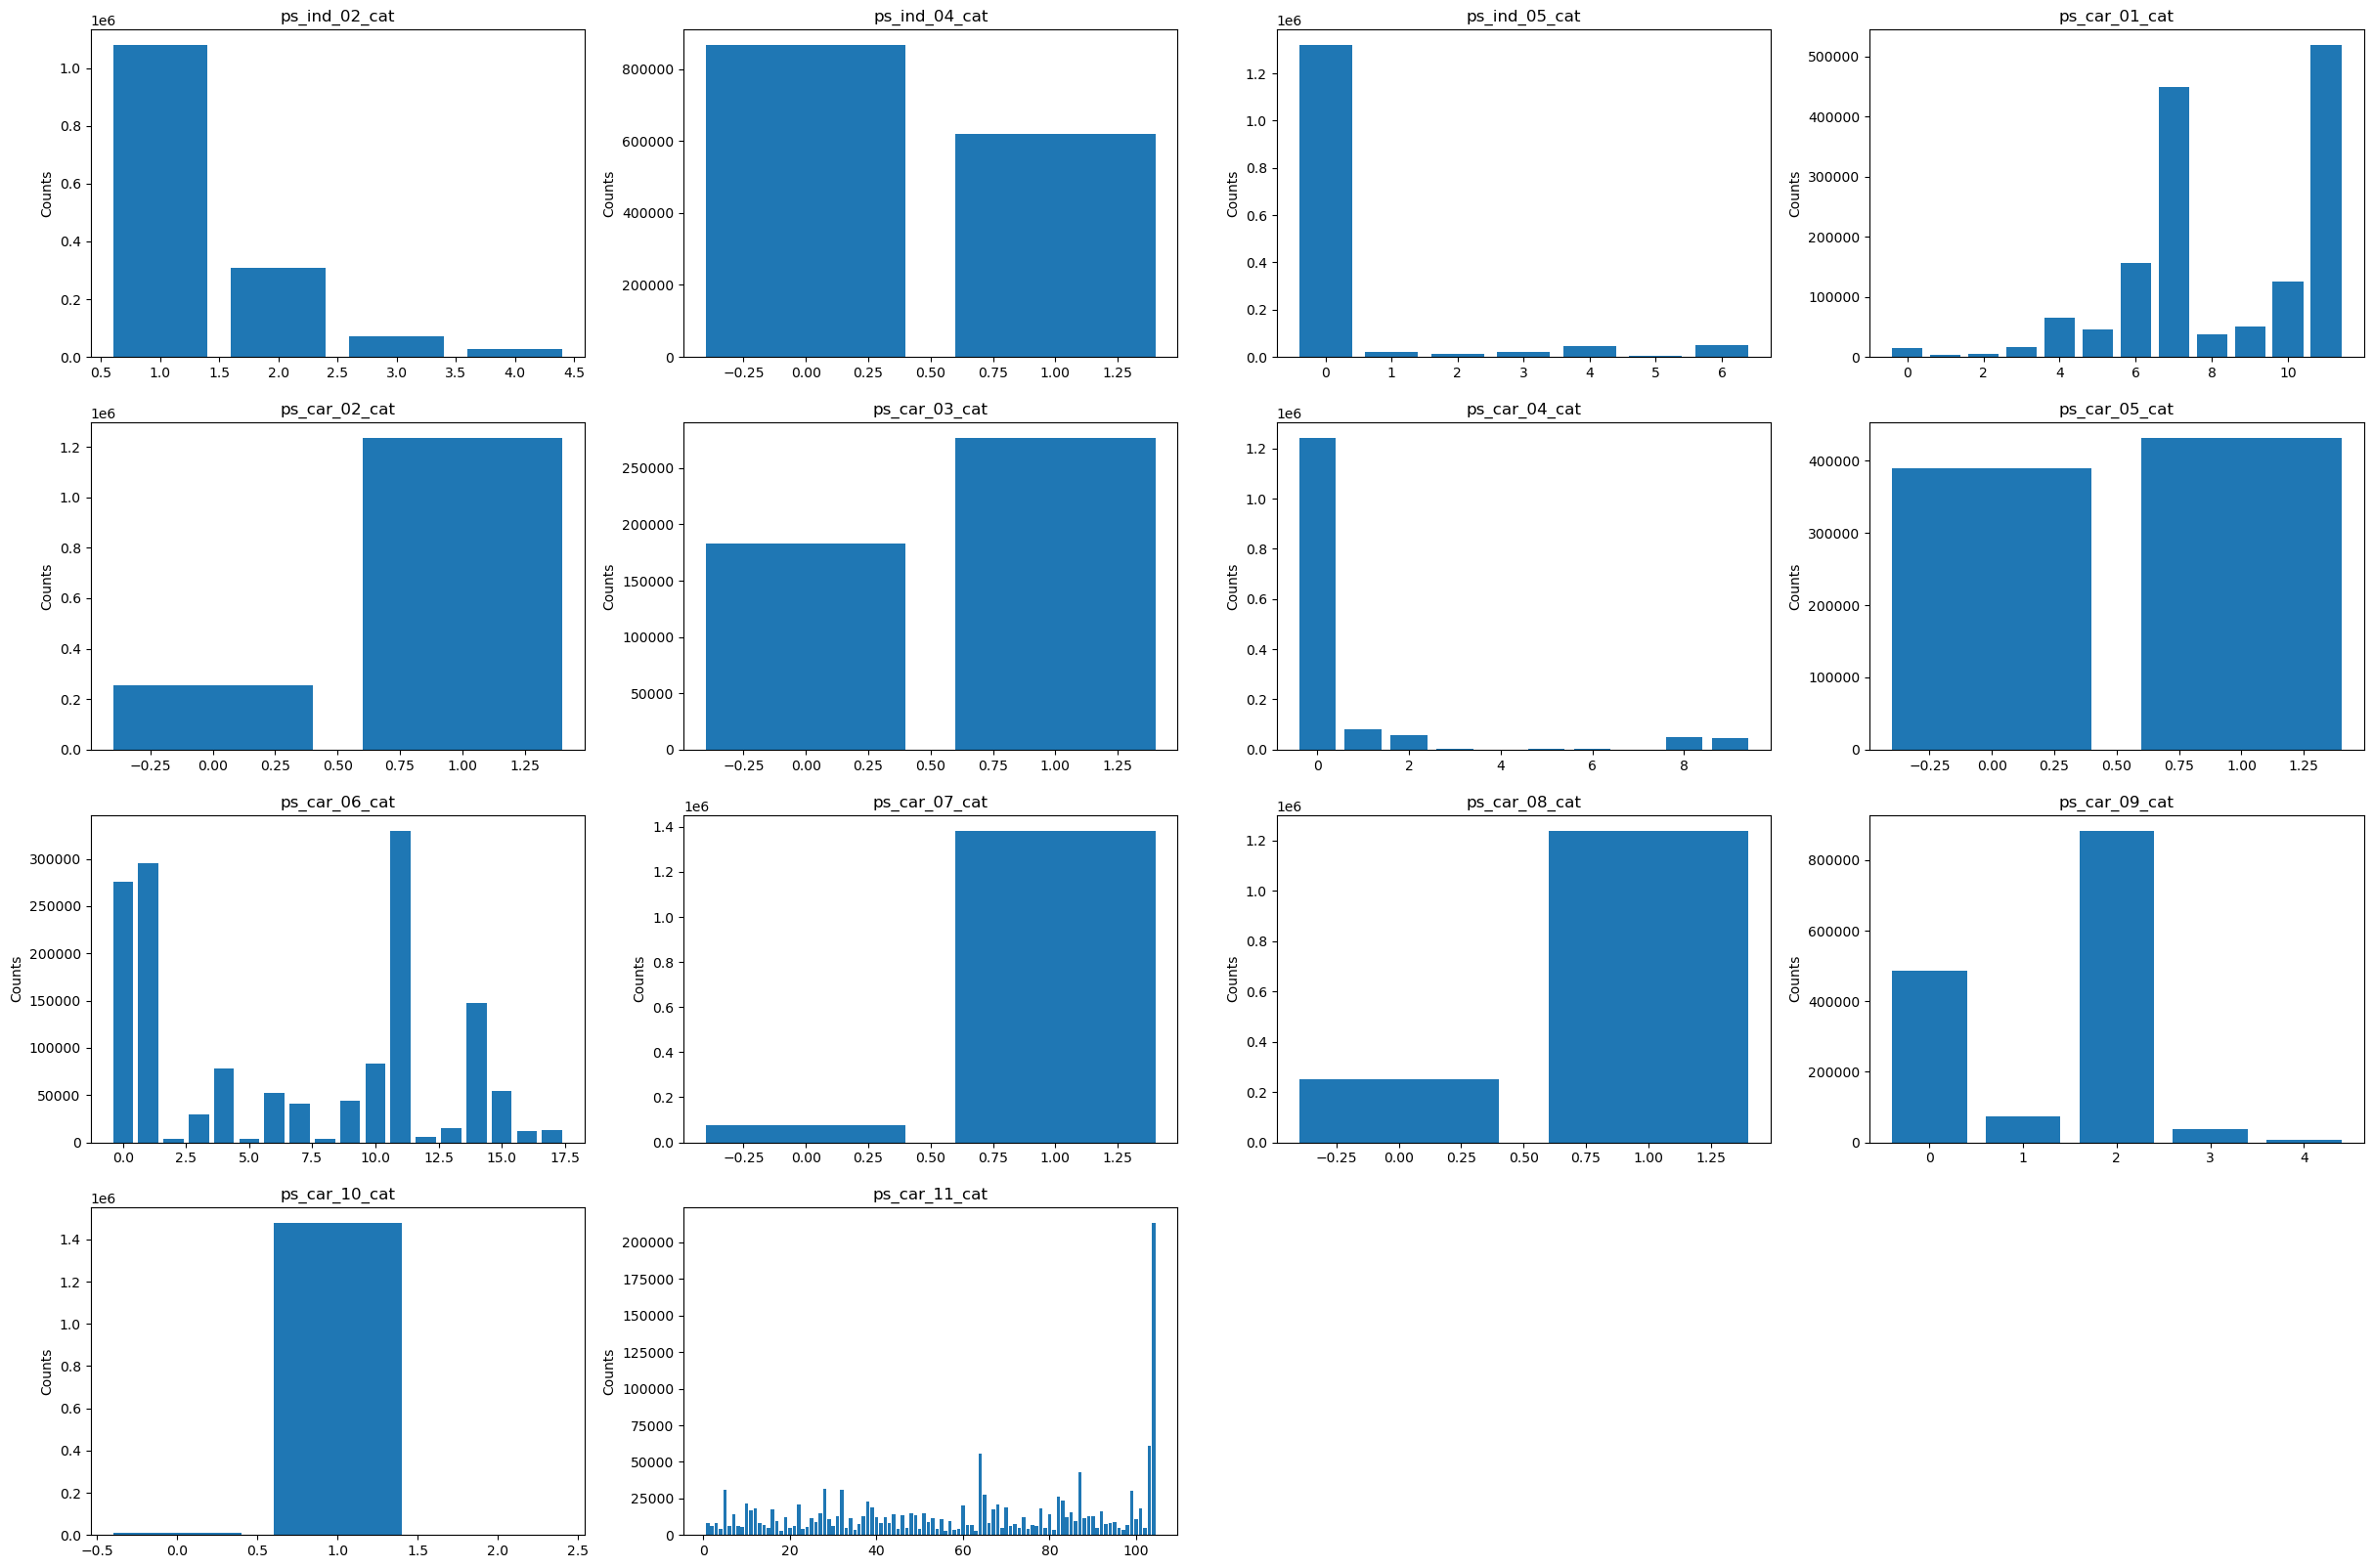

In [ ]:
##Draw a bar chart of each cat feature:：
k = 0
plt.figure(figsize=(30,20)) 
for x in cat:
    k = k+1
    names = list(data[x].value_counts().index)
    counts = list(data[x].value_counts().values)
    if x in col_missing:
        names.append(np.nan)
        counts.append(len(train) - sum(counts))
        
    plt.subplot(4,4,k)
    plt.title(x)
    plt.ylabel('Counts')
    plt.bar(names,counts)

From this analysis of the above figure, the following information can be obtained:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. The value distribution of most categorical variable features is uneven. Some features will have a small number of one or a few values ​​with high frequency, and the rest of the values ​​are very few. These features deserve follow-up attention.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. **ps_car_11_cat** has many categories and may be a continuous or ordinal variable that has been misclassified as a multicategorical variable.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. **ps_ind_04_cat**, **ps_car_02_cat**, **ps_car_03_cat**, **ps_car_05_cat** , **ps_car_07_cat**, **ps_car_08_cat** most likely to be misclassified binary variables<br>

In order to further analyze the relationship between multi-category features and target attribute, the next step is to calculate the probability of target=1 under different values ​​of each feature and make a graph:

**The relationship between multi-categorical variables and target**

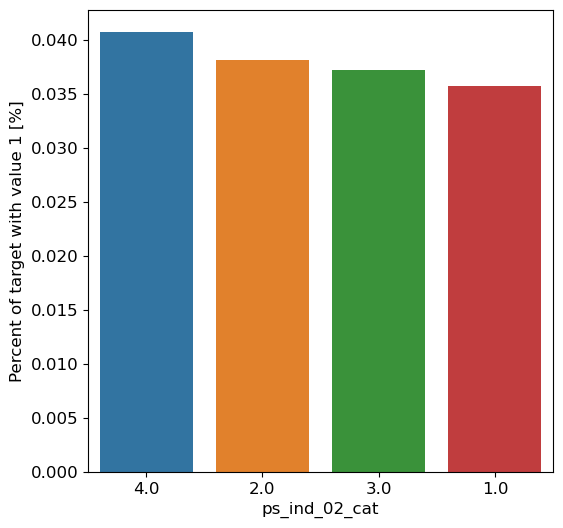

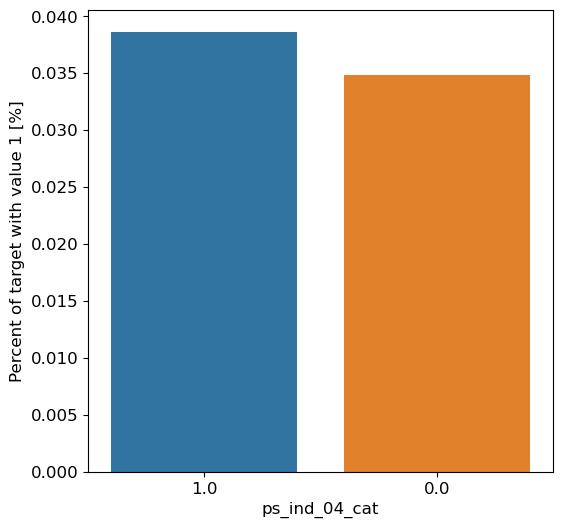

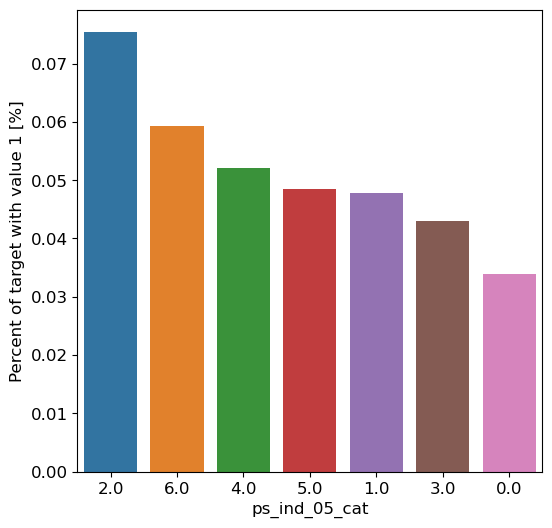

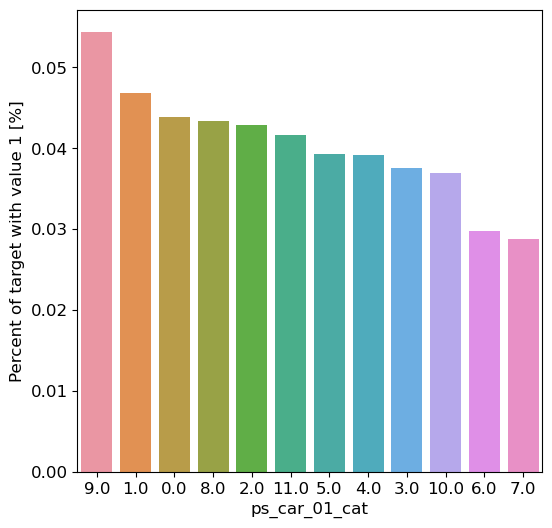

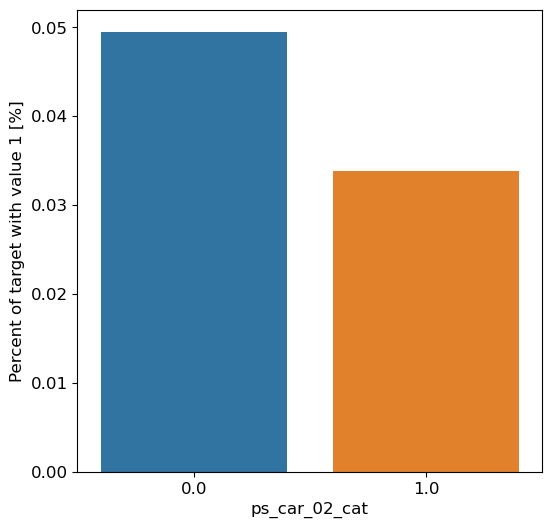

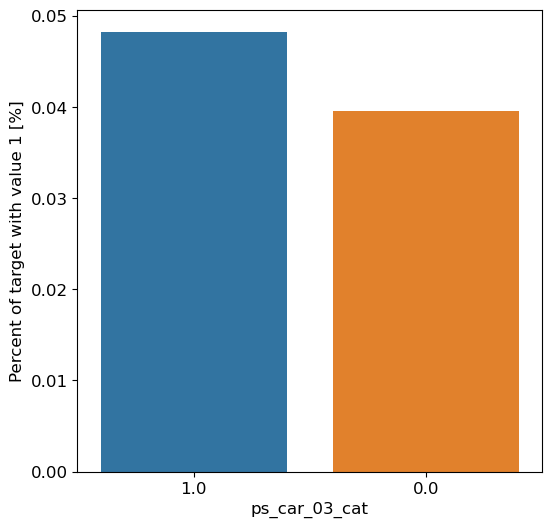

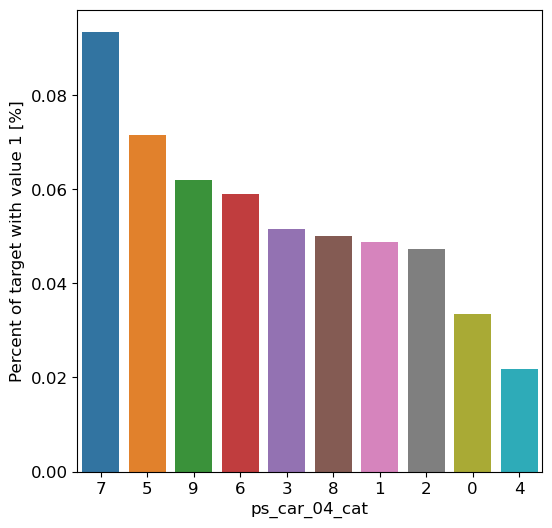

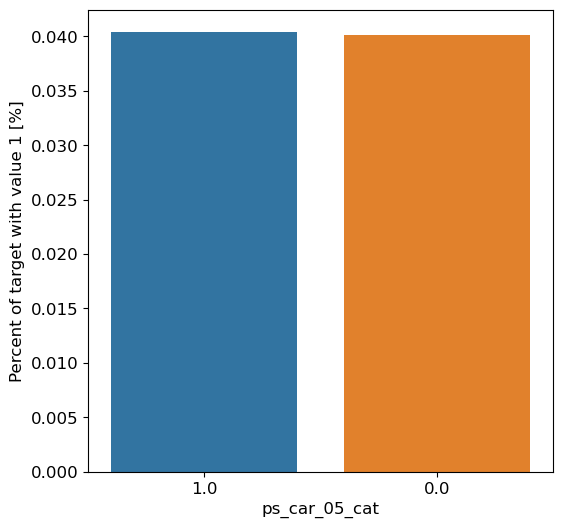

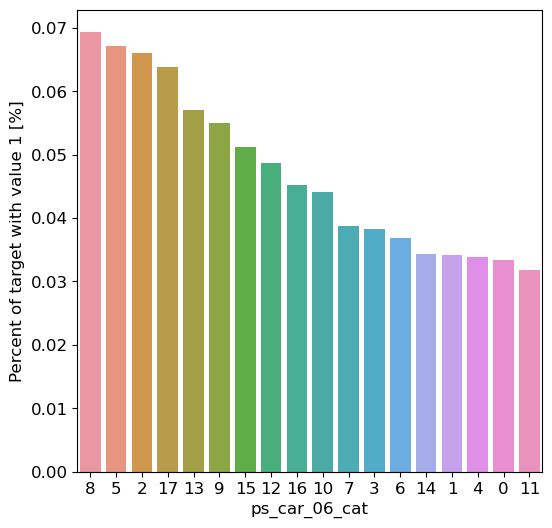

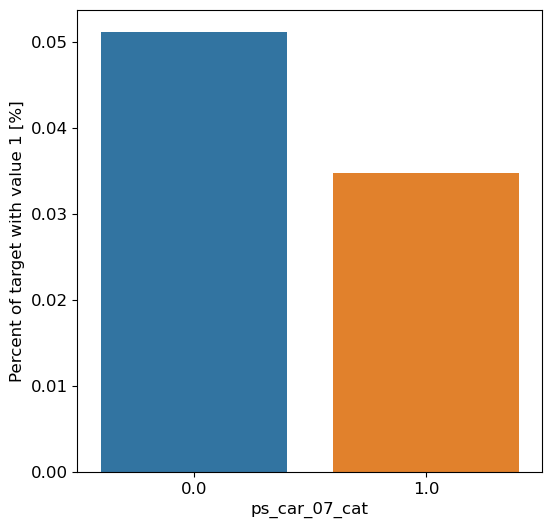

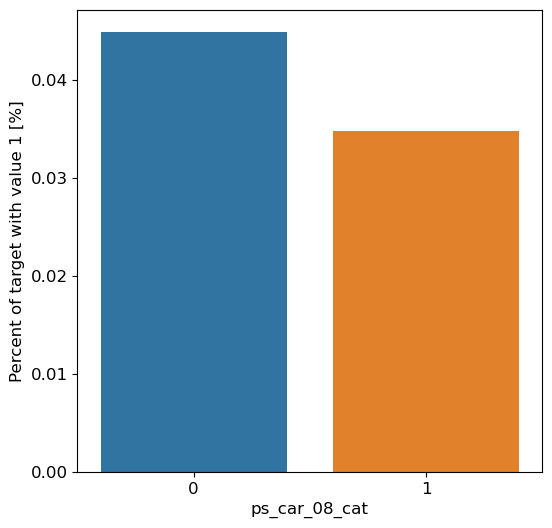

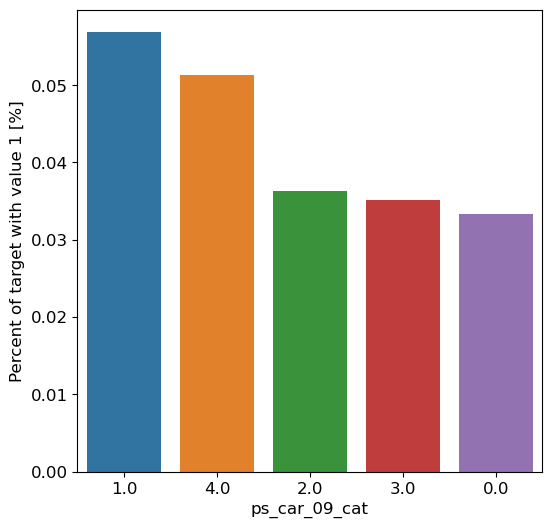

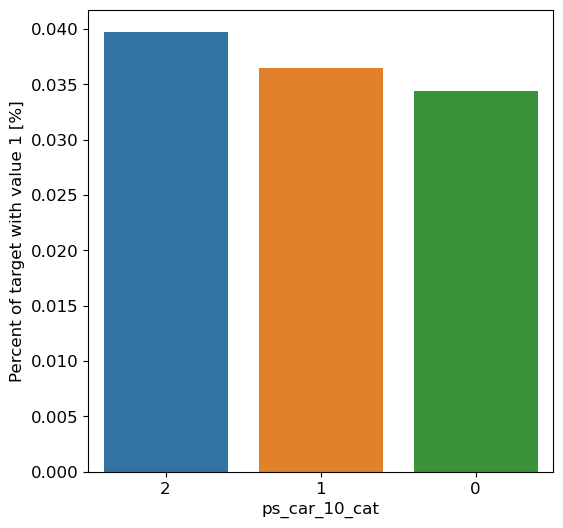

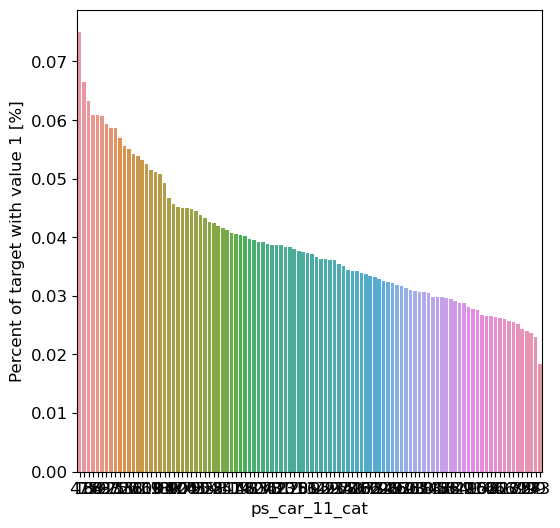

In [ ]:
for feature in cat:
    fig, ax = plt.subplots(figsize=(6,6))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[feature, 'target']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax,x=feature, y='target', data=cat_perc, order=cat_perc[feature])
    plt.ylabel('Percent of target with value 1 [%]', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

The above group of bar chat shows the ``Target=1`` under different values of each multi-category attribute. It brings an important insights that majority of missing values brings a very large impact on the value of the Target variable. The probability of getting the result of Target=1 in missing value on **ps_ind_02_cat** exceeds any other value of the attribute, while for **ps_car_02_cat**, the probability of Target=0 on missing value is almost 0. 

Missing value might not causing by lack of data but existance of other categories. Thus, treating missing values in these multi-categorical features as a separate category clearly makes more sense than imputing them as other categories using various methods.

### Continuous or sequential variable analysis

All non-residual (continuous or sequential) variable analyzed as below.<br>
First, get the value range of each variable and distinguish whether it is a continuous variable or an ordinal variable:

In [ ]:
cont_num = list()
for x in cont:
    v = len(data[x].value_counts())
    cont_num.append([v, x])
cont_num.sort()
for x in cont_num:
    print(x[1] + "'s kinds of value:", x[0])

ps_car_11's kinds of value: 4
ps_ind_14's kinds of value: 5
ps_calc_04's kinds of value: 6
ps_calc_05's kinds of value: 7
ps_calc_09's kinds of value: 8
ps_ind_01's kinds of value: 8
ps_calc_01's kinds of value: 10
ps_calc_02's kinds of value: 10
ps_calc_03's kinds of value: 10
ps_calc_07's kinds of value: 10
ps_reg_01's kinds of value: 10
ps_calc_06's kinds of value: 11
ps_calc_08's kinds of value: 12
ps_calc_12's kinds of value: 12
ps_ind_03's kinds of value: 12
ps_ind_15's kinds of value: 14
ps_car_15's kinds of value: 15
ps_calc_13's kinds of value: 16
ps_reg_02's kinds of value: 19
ps_calc_11's kinds of value: 21
ps_calc_14's kinds of value: 25
ps_calc_10's kinds of value: 26
ps_car_12's kinds of value: 213
ps_car_14's kinds of value: 904
ps_reg_03's kinds of value: 5076
ps_car_13's kinds of value: 104192


The above output results list the number of variable value types for all features without suffixes.<br>
Analysis shows as below: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;the following attribute **ps_car_13**、**ps_reg_03**、**ps_car_14**、**ps_car_12** belongs to**continuous variables**;<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The value of the rest of the attribute less than 30 which belongs to**ordinal variable**.

Classification of the features as below：

In [ ]:
con_cont = ['ps_reg_03','ps_car_12','ps_car_13','ps_car_14']
rank_cont = [x for x in cont if x not in con_cont]

**Continuous Variable Analysis**

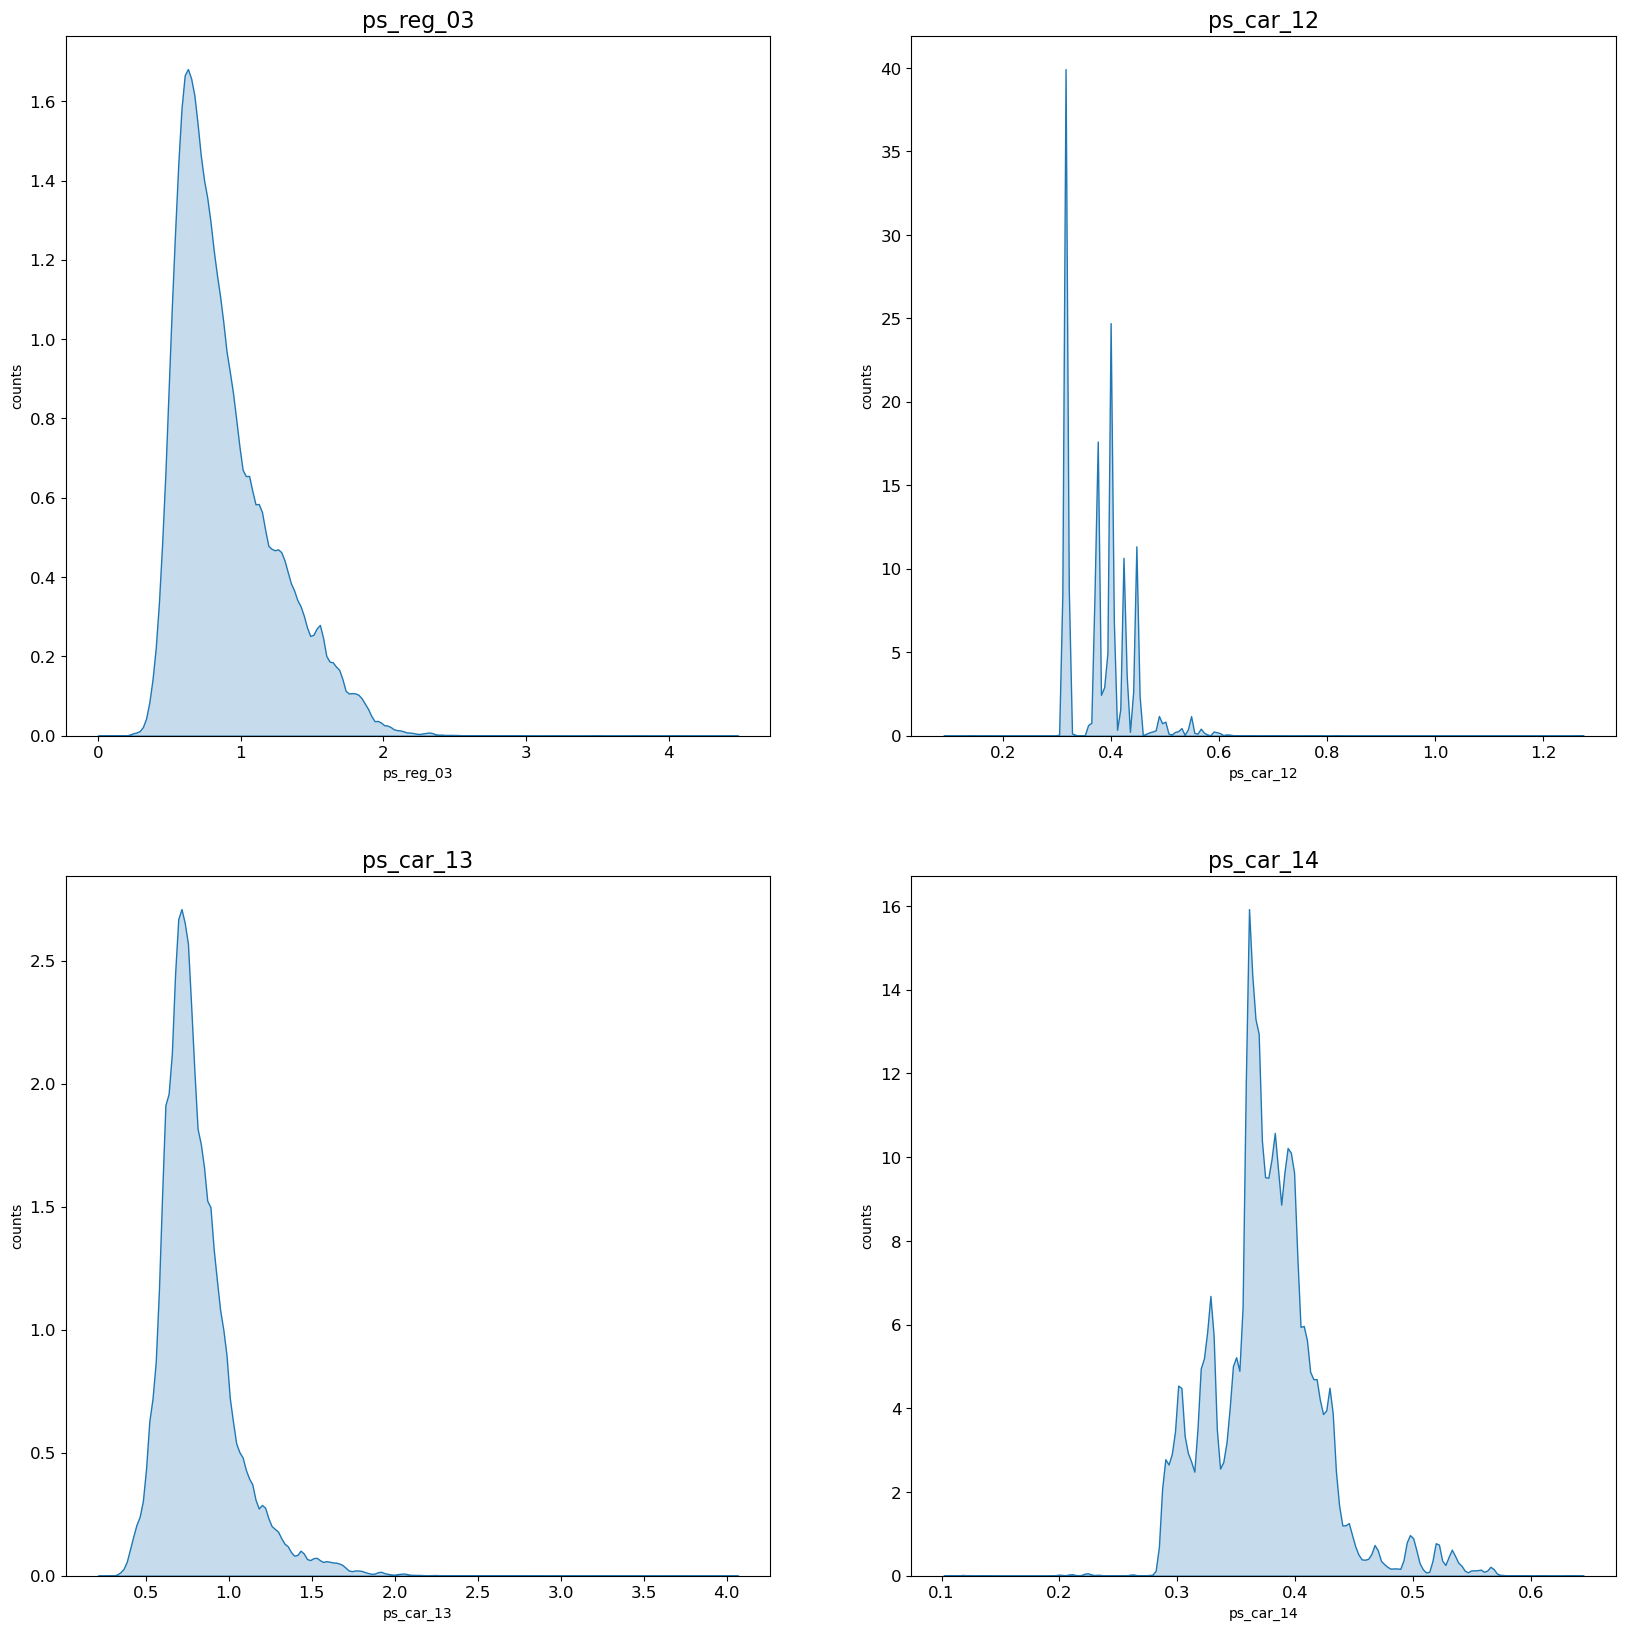

In [ ]:
k = 0
plt.figure(figsize=(20,20)) 
for x in con_cont:
    k = k+1
    plt.subplot(2,2,k)
    plt.title(x, size=16)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.ylabel('counts')
    sns.kdeplot(data[x].dropna(),shade=True)

**Ordinal Variable Analysis**

The figure below is a histogram plotted for all ordinal variables:

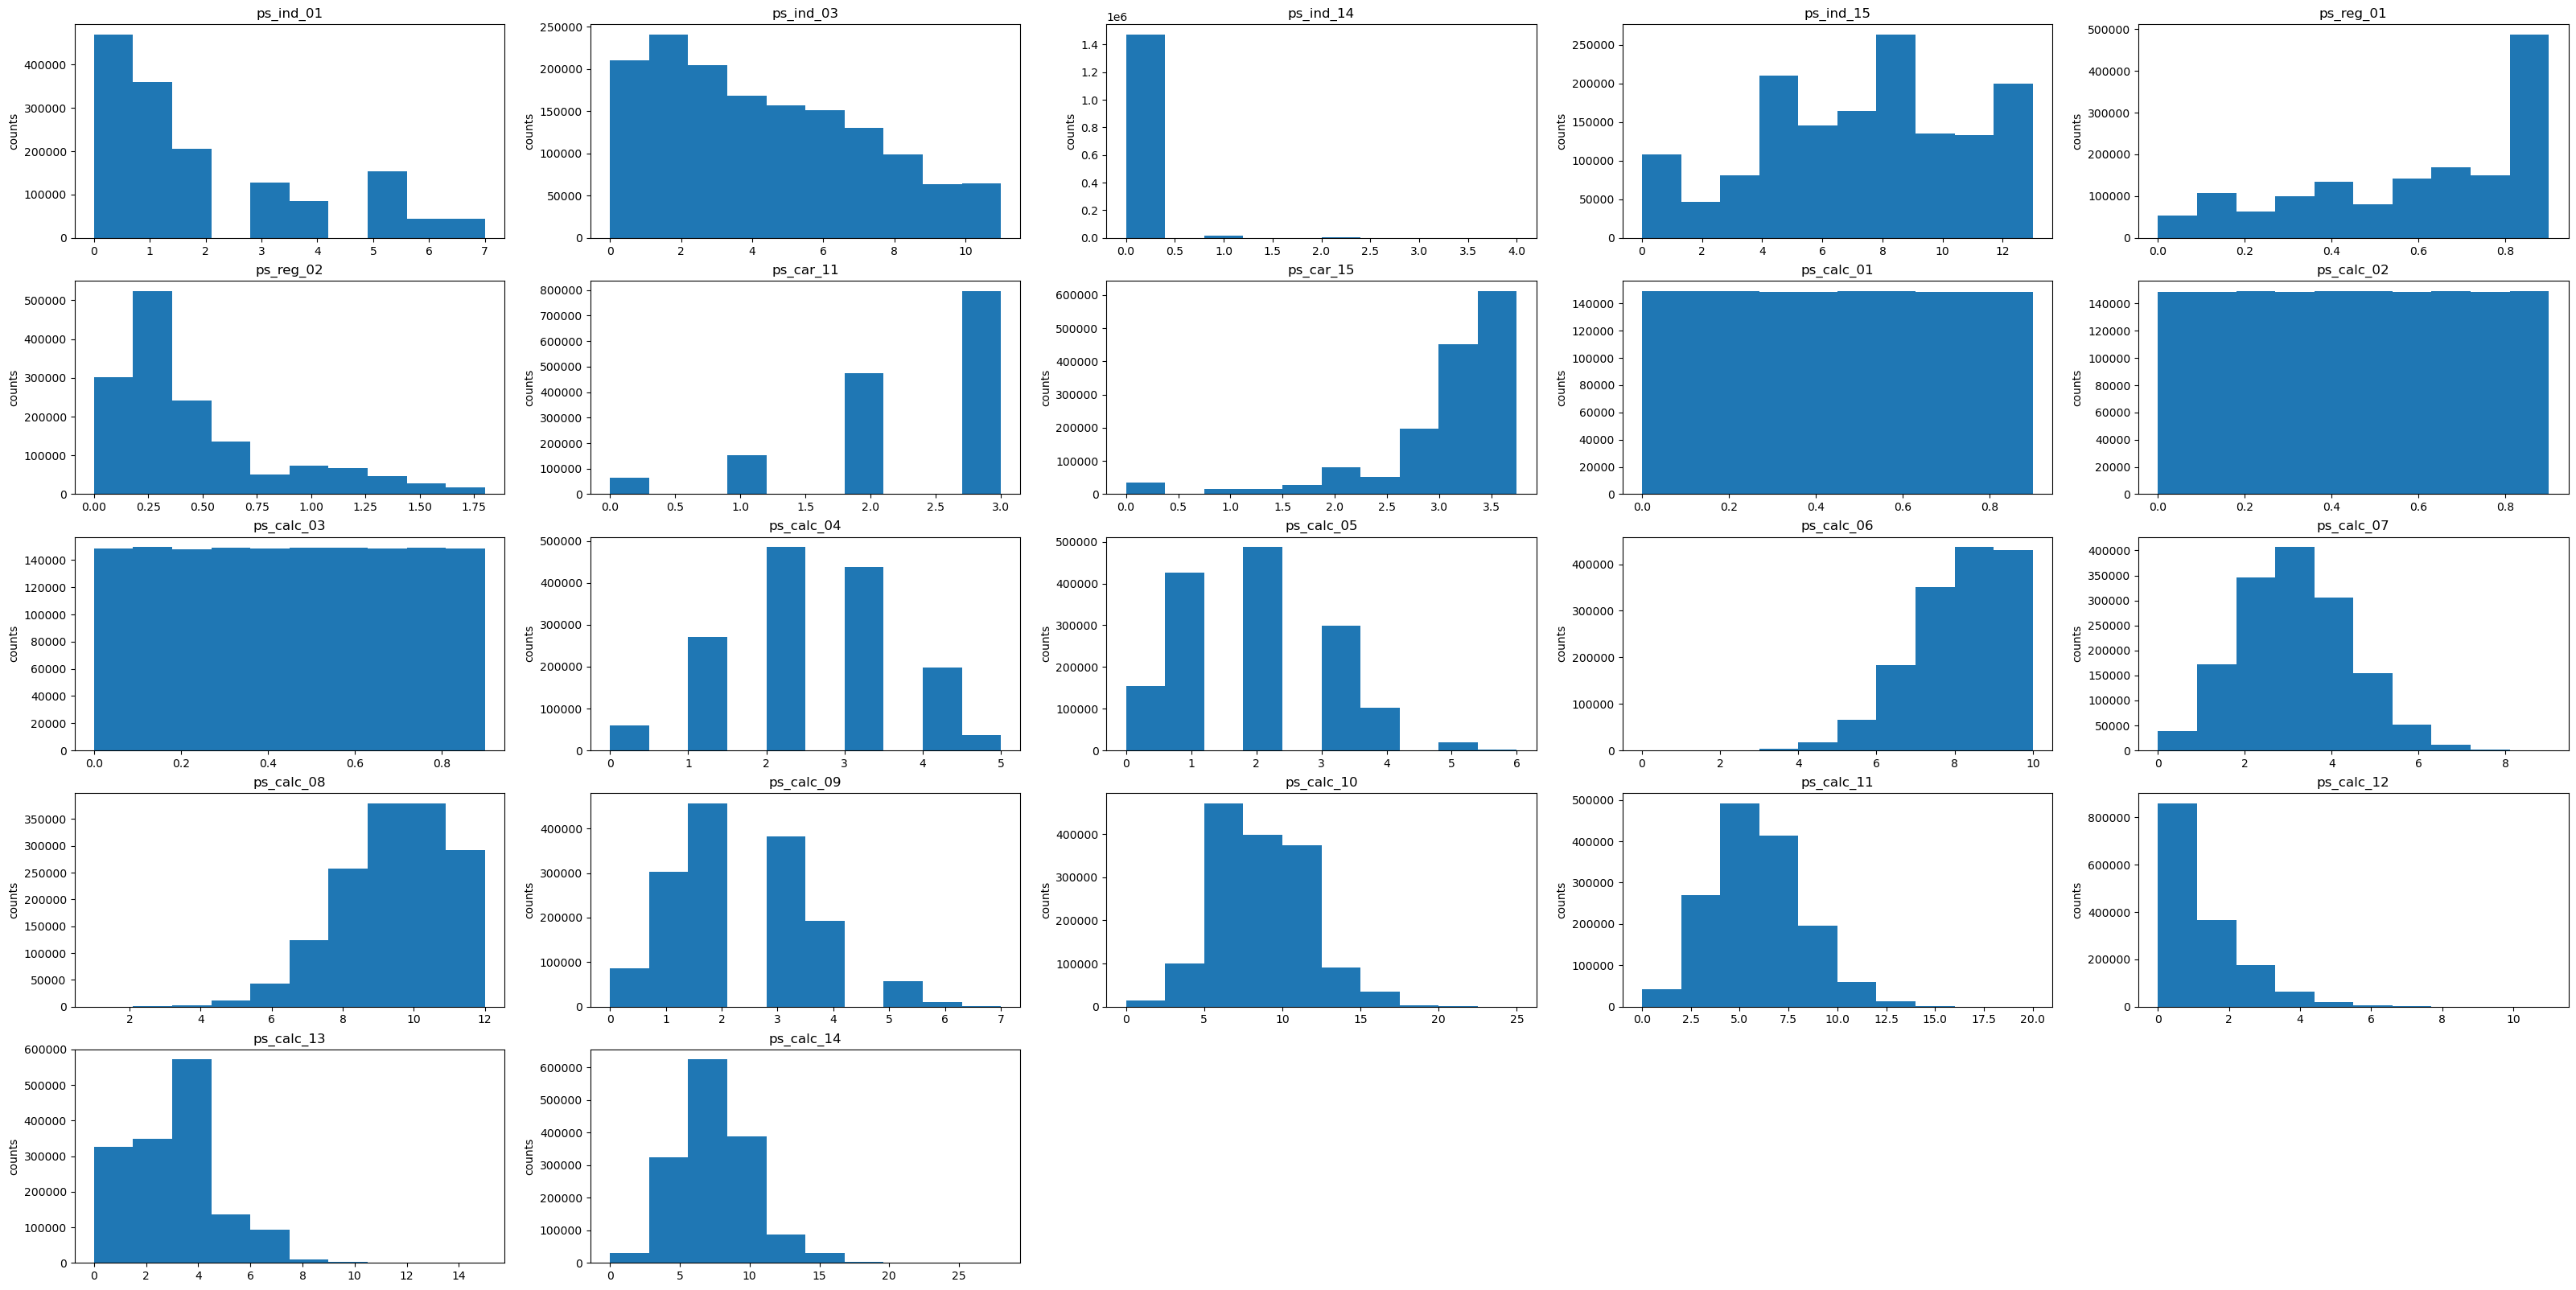

In [ ]:
k = 0
plt.figure(figsize=(40,20)) 
for x in rank_cont:
    k = k+1
    plt.subplot(5,5,k)
    plt.title(x)
    plt.ylabel('counts')
    plt.hist(data[x].dropna())

The distribution of each histogram analysed as below:<br>

- **ps_ind_01**，**ps_reg_01**，**ps_car_15**，**ps_reg_02**，**ps_calc_06** long-tailed distribution
- **ps_calc_04**，**ps_calc_07**，**ps_calc_05**，**ps_calc_09**，**ps_calc_11**，**ps_calc_14** normal distribution
- **ps_calc_01**，**ps_calc_02**，**ps_calc_03** uniform distribution
- **ps_ind_01**，**ps_ind_03**，**ps_reg_02**，**ps_calc_12**，**ps_calc_13** right-skewed distribution
- **ps_reg_01**，**ps_car_15**，**ps_calc_06**，**ps_calc_08** left skewed distribution


Most of the normal and uniform distributions are all characterized by `calc` prefix, however `ind`、`car`、`reg` value distribution of the prefix is imbalance.

## Missing value handling

After missing value analysis, we have learned that: 
1. Columns with missing values ​​are: <br>
**ps_car_01_cat**<br>
**ps_car_02_cat**<br>
**ps_car_03_cat**<br>
**ps_car_05_cat**<br>
**ps_car_07_cat**<br>
**ps_car_09_cat**<br>
**ps_ind_02_cat**<br>
**ps_ind_04_cat**<br>
**ps_ind_05_cat**<br>
**ps_car_11**<br>
**ps_car_12**<br>
**ps_car_14**<br>
**ps_reg_03**<br>

2. The attribute with the most missing values ​​is: **ps_car_03_cat** with a total of 1 millon records with approximately $\,70\,$% of record.<br>
**ps_car_05_cat** with the second most missing value, following with **ps_reg_03**, **ps_car_14**, **ps_car_07_cat**, **ps_ind_05**. Other than the following attribute with the least missing value. 

As a result of the analysis shows that remove the record of the `target` column is not the appropriate method to deal with the missing data.

The missing values ​​are handled as follows：

- Multiple categorical variable missing value with **cat** prefix will be set as the value of -1 in the training model as a brand new category. 
- **ps_car_11** and **ps_car_12**: Apply median imputation directly. 
- **ps_reg_03** and **ps_car_14**: The following attribute consists of the most missing value. preserve the missing information, two additional binary features are applied on **ps_reg_03_miss** and **ps_car_14_miss**. 1 indicate as missing value, otherwise 0.


In [ ]:
miss_cat = [x for x in col_missing if x in cat]
train[miss_cat] = train[miss_cat].replace(np.nan,-1)
miss_nocat = [x for x in col_missing if x not in miss_cat]
train['ps_reg_03_miss'] = np.zeros(len(train))
train['ps_reg_03_miss'] [train.ps_reg_03.isnull()] = 1
test['ps_reg_03_miss'] = np.zeros(len(test))
test['ps_reg_03_miss'] [test.ps_reg_03.isnull()] = 1
train['ps_car_14_miss'] = np.zeros(len(train))
train['ps_car_14_miss'] [train.ps_car_14.isnull()] = 1
test['ps_car_14_miss'] = np.zeros(len(test))
test['ps_car_14_miss'] [test.ps_car_14.isnull()] = 1
train[miss_nocat] = train[miss_nocat].replace(np.nan,train[miss_nocat].median())

## EDA report generation using Pandas-profiling

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')
# import pandas as pd
# import pandas_profiling
# pfr = pandas_profiling.ProfileReport(train[:100000])
# pfr.to_file("train_report.html")

## Data Storing 

In [ ]:
train.shape, test.shape

((595212, 61), (892816, 60))

In [ ]:
train.to_csv("train_EDA.csv", index=False)
test.to_csv("test_EDA.csv", index=False)

# Modeling

To start with cross-validation and integration, we prepare an Ensamble class to split the data in Kfold, train the model and record the results.

This class has an init method that takes 4 arguments (called when the Ensamble object is created):
- self - the object to be initialised
- n_splits - the number of cross-validation splits to use
- stacker - the model used to stack the predictions of the training base model
- base_models - the list of base models used in the training

The second method, fit_predict, has four functions.
- Performing n_splits splits on the training data.
- Running each of the collapsed base models.
- making predictions using each model.
- integration of the results using the stack.

### Two ideas for building models.(suggested )
1. The first is to use the **XGBoost** model as the **Stacker** and the **BaseModel** to select 3 **LightGBM** models.
2. The second is to use the **LR** model as a Stacker, with 3 **LightGBM** models selected for BaseMode.


## Feature Engineering

After we have completed the cleaning and analysis of the data earlier, we next perform feature engineering based on these analyses.

Feature engineering involves detecting, deforming, and filtering the original data features, as well as constructing new features that may be useful for model building, and it is an important step in machine learning.

In the feature engineering part, our project has three core strengths:

1. close articulation of the data understanding section above, with analytical exploration based on missing values, dichotomous features, multicategorical features, and continuous or sequential features, respectively.
2. innovative use of **Random Forest and XGBoost models** for modeling, as these two models have the ability to automatically select features as combined tree models, and the feature importance ranking they provide will help the feature selection process.
3. For the processing of multicategorical feature variables, the conventional practice is to transform them into multiple two-dimensional dummy variables based on the values taken from multicategorical features and then model them. However, this has two drawbacks: first, it leads to a rapid increase in the number of data dimensions, which is too much computational pressure on the local computer; second, it may lead to the loss of certain information that should reflect the relationship between the individual fetched values. In our project,we innovatively use **a method that to transform categorical variables into continuous variables based on the likelihood probability of the target variable at each value of the variable**.

## Feature processing based on missing value
In EDA, regarding missing values we have come to the following conclusions:

1) There is a strong correlation between the absence of the following features:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_car_01_cat** & **ps_ind_04_cat**&nbsp;——&nbsp;$0.8$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_car_07_cat** & **ps_ind_05_cat**&nbsp;——&nbsp;$0.7$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_car_01_cat** & **ps_ind_02_cat**&nbsp;——&nbsp;$0.6$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_car_03_cat** & **ps_car_05_cat**&nbsp;——&nbsp;$0.6$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_ind_02_cat** & **ps_ind_04_cat**&nbsp;——&nbsp;$0.6$<br>

Based on this, we construct the following three features：<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**missing_sum1**：The sum of the number of samples with missing values in the three features ps_ind_02_cat, ps_ind_04_cat, and ps_car_01_cat.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**missing_sum2**：The sum of the number of samples with missing values in the features ps_car_07_cat and ps_ind_05_cat.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**missing_sum3**：The sum of the number of samples with missing values in the two features ps_car_03_cat and ps_car_05_cat.<br>

The codes are as follows:

In [ ]:
train['missing_sum1'] = np.zeros(len(train))
train['missing_sum2'] = np.zeros(len(train))
train['missing_sum3'] = np.zeros(len(train))

## missing_sum1：ps_ind_02_cat、ps_ind_04_cat、ps_ind_04_cat
train['missing_sum1'][train.ps_ind_02_cat==-1] += 1
train['missing_sum1'][train.ps_ind_04_cat==-1] += 1
train['missing_sum1'][train.ps_car_01_cat==-1] += 1

## missing_sum2：ps_car_07_cat和ps_ind_05_cat
train['missing_sum2'][train.ps_car_07_cat==-1] += 1
train['missing_sum2'][train.ps_ind_05_cat==-1] += 1

## missing_sum3：ps_car_03_cat和ps_car_05_cat
train['missing_sum3'][train.ps_car_03_cat==-1] += 1
train['missing_sum3'][train.ps_car_05_cat==-1] += 1

Same processing for the test set

In [ ]:
test['missing_sum1'] = np.zeros(len(test))
test['missing_sum2'] = np.zeros(len(test))
test['missing_sum3'] = np.zeros(len(test))

## missing_sum1：ps_ind_02_cat、ps_ind_04_cat、ps_ind_04_cat
test['missing_sum1'][test.ps_ind_02_cat==-1] += 1
test['missing_sum1'][test.ps_ind_04_cat==-1] += 1
test['missing_sum1'][test.ps_car_01_cat==-1] += 1

## missing_sum2：ps_car_07_cat和ps_ind_05_cat
test['missing_sum2'][test.ps_car_07_cat==-1] += 1
test['missing_sum2'][test.ps_ind_05_cat==-1] += 1

## missing_sum3：ps_car_03_cat和ps_car_05_cat
test['missing_sum3'][test.ps_car_03_cat==-1] += 1
test['missing_sum3'][test.ps_car_05_cat==-1] += 1

Next, we analyze the relationship of the added variables to the Target variables:

In [ ]:
missing_sum = ['missing_sum1','missing_sum2', 'missing_sum3']

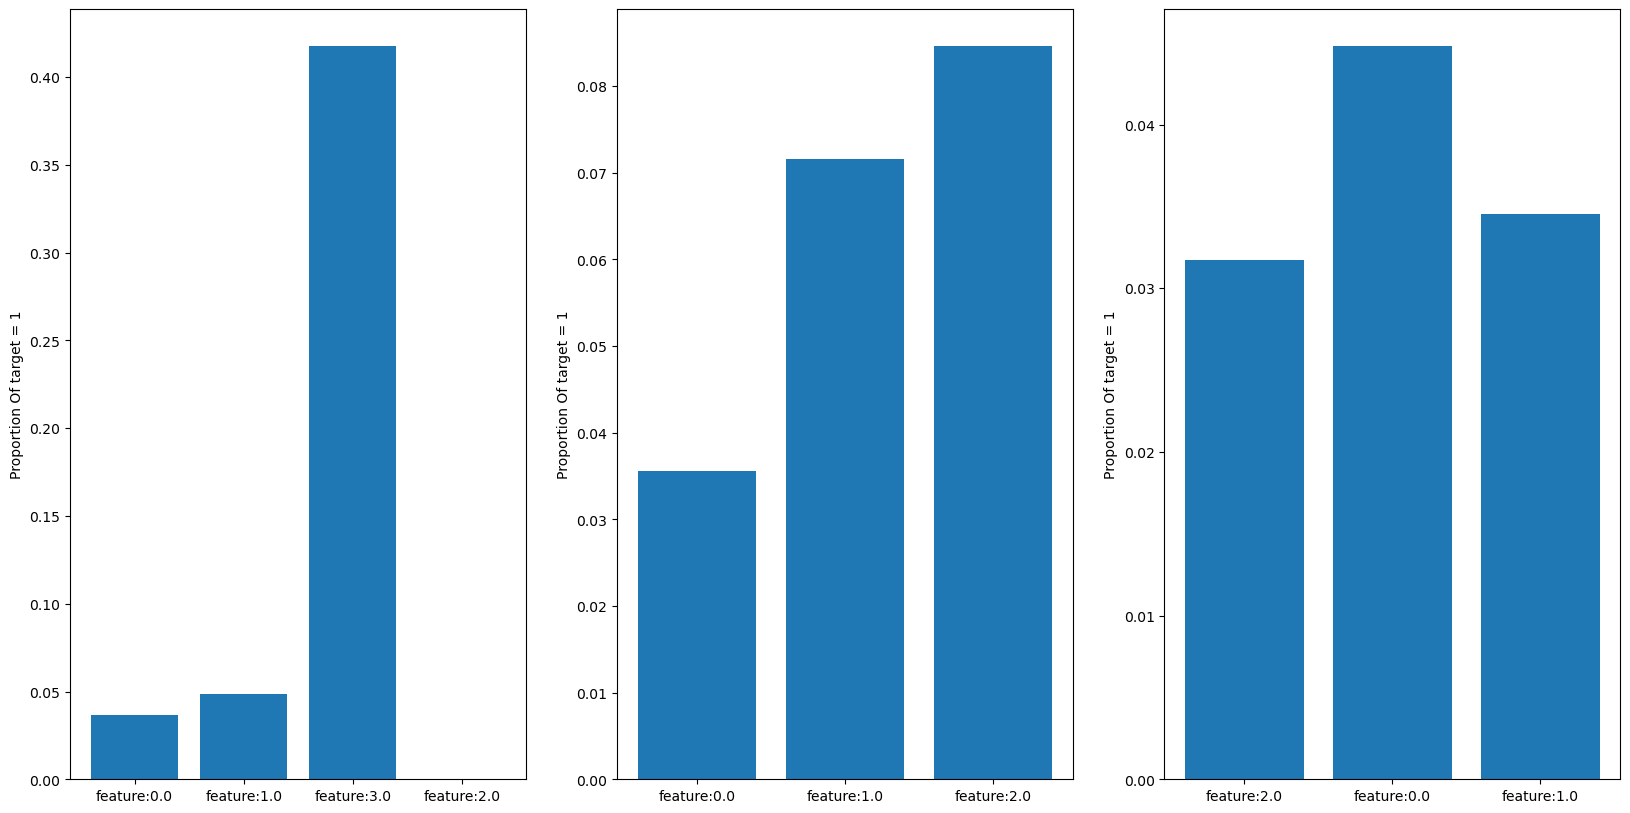

In [ ]:
##Graph to observe the relationship between the three characteristics and the Target variable：
import matplotlib.pyplot as plt

k = 0
plt.figure(figsize=(20,10))
for x in missing_sum:
    k = k+1
    plt.subplot(1,3,k)
    names = [];prop = []
    va = train[x].value_counts().index
    for name in va:
        names.append('feature:'+str(name))
        props = train[train[x]==name].target.value_counts()
        prop_1 = 0;prop_0 = 0
        if 1 in props.index:prop_1 = props[1]
        if 0 in props.index:prop_0 = props[0]
        prop.append(prop_1/(prop_1+prop_0))
    plt.ylabel('Proportion Of target = 1')
    plt.bar(names,prop)

**conclusion**：Calculating the conditional probabilities of target=1 with respect to these three new features, we can see that the proportion of samples with target=1 is significantly different depending on the different values of these new features, indicating that these features may be able to play a role in the prediction of target.

## Feature processing based on dichotomous features

The following facts have been obtained previously by understanding the data for the dichotomous variables：
The following features have a strong positive correlation:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_ind_12_bin** & **ps_ind_14**&nbsp;——&nbsp;$0.89$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_reg_02** & **ps_reg_03**&nbsp;——&nbsp;$0.74$<br>

The following features have a strong positive correlation:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_car_12** & **ps_car_13**&nbsp;——&nbsp;$0.67$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_car_12** & **ps_car_14**&nbsp;——&nbsp;$0.6$<br>

The following features have a strong negative correlation:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ps_ind_16_bin** & **ps_ind_18_bin**&nbsp;——&nbsp;$(-0.6)$<br>

Looking at the relevant graphs reveals, **ps_ind_06_bin**、**ps_ind_07_bin**、**ps_ind_08_bin**、**ps_ind_09_bin** These four columns, which seem to have some kind of negative correlation with each other.

In view of this, the following treatment is done:

**bin_plus_1**: These four columns are added together - **ps_ind_06_bin**、**ps_ind_07_bin**、**ps_ind_08_bin**、**ps_ind_09_bin** <br>
**bin_plus_2**: These three columns are added together - **ps_ind_16_bin**、**ps_ind_17_bin**、**ps_ind_18_bin** 

In [ ]:
##Construct features based on bin features
train['bin_plus_1'] =  train['ps_ind_06_bin']+train['ps_ind_07_bin']+train['ps_ind_08_bin']+train['ps_ind_09_bin']
train['bin_plus_2'] = train['ps_ind_16_bin']+train['ps_ind_17_bin']+train['ps_ind_18_bin']

In [ ]:
train.bin_plus_1.count()

595212

In [ ]:
train.bin_plus_1.value_counts()

1    595212
Name: bin_plus_1, dtype: int64

However, looking at the distribution of the new feature **bin_plus_1**, we are surprised to find that all of its values are 1.<br>
This suggests that at least one feature is unnecessary.<br>
So we remove the new feature **bin_plus_1**, and one of the features **ps_ind_09_bin**.

In [ ]:
train = train.drop('bin_plus_1',axis=1)
train = train.drop('ps_ind_09_bin',axis=1)
test = test.drop('ps_ind_09_bin',axis=1)

Redraw the correlation diagram for the remaining three features

In [ ]:
calc = []
car = []
ind = []
reg = []

for i in range(len(data.columns)):
    feature = train.columns[i]
    if feature.find('car') != -1:
        car.append(feature)
    elif feature.find('calc')!= -1:
        calc.append(feature)
    elif feature.find('ind')!= -1:
        ind.append(feature)
    elif feature.find('reg')!= -1:
        reg.append(feature)

bin_ = []
cat = []
cont = []

for i in range(len(data.columns)):
    feature = train.columns[i]
    if feature.find('bin') != -1:
        bin_.append(feature)
    elif feature.find('cat')!= -1:
        cat.append(feature)
    elif feature != 'target' and feature != 'id':
        cont.append(feature)

In [ ]:
triple_feature = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin']

<AxesSubplot:title={'center':'Pearson_bin_other'}>

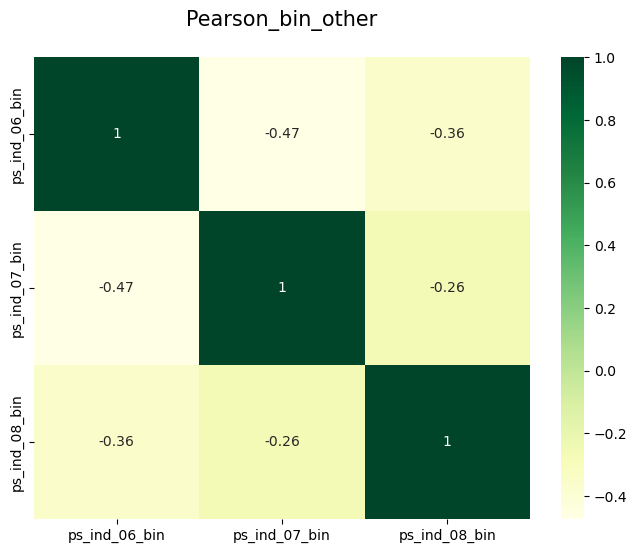

In [ ]:
import seaborn as sns
colormap = plt.cm.YlGn
plt.figure(figsize=(8,6))
plt.title(u'Pearson_bin_other', y=1.05, size=15)
sns.heatmap(data[triple_feature].corr(), cmap=colormap, annot=True)

We can see that **ps_ind_06**, **ps_ind_07** and **ps_ind_08** still have some negative correlation with each other, but it is not as obvious as before.<br>
The following reconstructs a new **bin_plus_1** such that **bin_plus_1 = ps_ind_06_bin + ps_ind_07_bin + ps_ind_08_bin**.

In [ ]:
train['bin_plus_1'] = train['ps_ind_06_bin'] + train['ps_ind_07_bin'] + train['ps_ind_08_bin']

# Also constructed in the test set:
test['bin_plus_1'] = test['ps_ind_06_bin'] + test['ps_ind_07_bin'] + test['ps_ind_08_bin']
test['bin_plus_2'] = test['ps_ind_16_bin'] + test['ps_ind_17_bin'] + test['ps_ind_18_bin']

Next, the relationship of the added variables to the Target variables is analyzed.

It is found that these two new features have little effect on the label column`target`so they may not be good features and are left for later screening.<br>
As can be seen from the figure above, both of these additional features are dichotomous variables.

In [ ]:
bin_.append('bin_plus_1')
bin_.append('bin_plus_2')

## Feature processing based on multi-category features

In data exploratory analysis (EDA) analysis, we already know that:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. The distribution of values for the vast majority of features of categorical variables is uneven, with a few features having a very high frequency of one or a few values and the rest having very few values, and these features are worthy of follow up attention.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. **ps_car_11_cat** has many categories and may be a continuous or sequential variable that is misclassified into multiple categorical variables.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. **ps_ind_04_cat**、**ps_car_02_cat**、**ps_car_03_cat**、**ps_car_05_cat**、**ps_car_07_cat**、**ps_car_08_cat** Most likely to be a misclassified dichotomous variable.<br>
Based on the previous analysis we have learned that there are 14 multicategorical features marked as _cat in the dataset.

It is worth noting that among these 14 multi-classification features there are actually two features that are dichotomous features. They are ps_car_08_cat and ps_ind_04_cat, where ps_ind_04_cat has missing values, so it can also be considered as a multicategorical feature, but ps_car_08_cat would have to be excluded from the multicategorical variables.

In [ ]:
#Remove ps_car_08_cat from multiple categories
cat.remove('ps_car_08_cat')
bin_.append('ps_car_08_cat')

Next, there are 13 multicategorical variable features left to be analyzed.

The commonly used modeling approach for multicategorical variables is to transform them into multiple two-dimensional pieces of a dummy variable based on the values taken for the multicategorical features, which are then modeled. However, this has two drawbacks.
- First, it can lead to a rapid increase in the dimensionality of the data, which is computationally overstressed for local computers.
- Second, it may lead to the loss of certain information that should reflect the relationship between the individual fetched values.

This project will use a method that converts categorical variables into continuous variables based on the likelihood probability of the target variable at each value of the variable. However, before implementation, another fact must be considered: from the previous analysis results, it is likely that there are features in the dataset that are misclassified, there are two-dimensional features that are classified as multicategorical features, and the ps_car_11_cat feature has really too many desirable values, about 100+, and it is more like a sequential or fixed distance variable feature than a multicategorical variable. In this case, we believe that the existing classification features are likely to have features that are misclassified from sequential or fixed distance variables. Therefore, for multicategorical features, we make the following treatment.
- (1) A copy is kept for all multicategorical features, and these variable types are treated as continuous or sequential variables, and the missing values are re-interpolated to the median.
- (2) The original multicategorical features are then transformed into continuous variable features according to the Target likelihood probabilities as described above.

In [ ]:
## Keep a copy for all multicategorical features and re-interpolate missing values as sequential variable features
cat_to_rank_col = []
for x in cat:
    name = x+'_rank'
    co = train[x]
    co = co.replace(-1,np.nan)
    co = co.replace(np.nan,co.median())
    cat_to_rank_col.append(name)
    train[name] = co

for x in cat:
    name = x+'_rank'
    co = test[x]
    co = co.replace(-1,np.nan)
    co = co.replace(np.nan,co.median())
    test[name] = co

##Next, transform all the original multiclassification features, based on Bayesian probabilities, into continuous-type features
y = train.target
nTR = len(y)
nY = len(y[y==1])
nYTR = nY/nTR
for coll in cat:
    cat1 = train[coll]
    cat2 = train[coll][y==1]
    cat3 = test[coll]
    valuec1 = cat1.value_counts()
    valuec2 = cat2.value_counts()
    catdict = {}
    for i in valuec1.index: 
        ind = i
        ni = valuec1[ind]
        if ind in valuec2.index:
            niY = valuec2[ind] 
        else:
            niY = 0
        lamda = 1/(1+np.exp(20-0.1*ni))
        smoothing = lamda*niY/ni+(1-lamda)*nYTR
        catdict[ind] = smoothing
    #print (catdict)
    for i in valuec1.index: 
        cat1[cat1==i] = catdict[i]
        cat3[cat3==i] = catdict[i]
    train[coll] = cat1
    test[coll] = cat3

At this point, the multiclassification feature processing is complete and only 2D variables with continuous, sequential variables are left in the dataset.

## Analysis based on continuous or sequential features and the correlation coefficient matrix

Features in the original dataset that do not have the _bin or _cat suffix are continuous or sequential variables, but the continuous or sequential features discussed in this paragraph are not only these, but also include the original multiclassification features that have been transformed into continuous variables based on Bayesian probabilities.

Since there are no more multiclassification features in the data at this point, the correlation coefficient matrix is redrawn for all features of the entire training set as follows.

<AxesSubplot:title={'center':'Pearson'}>

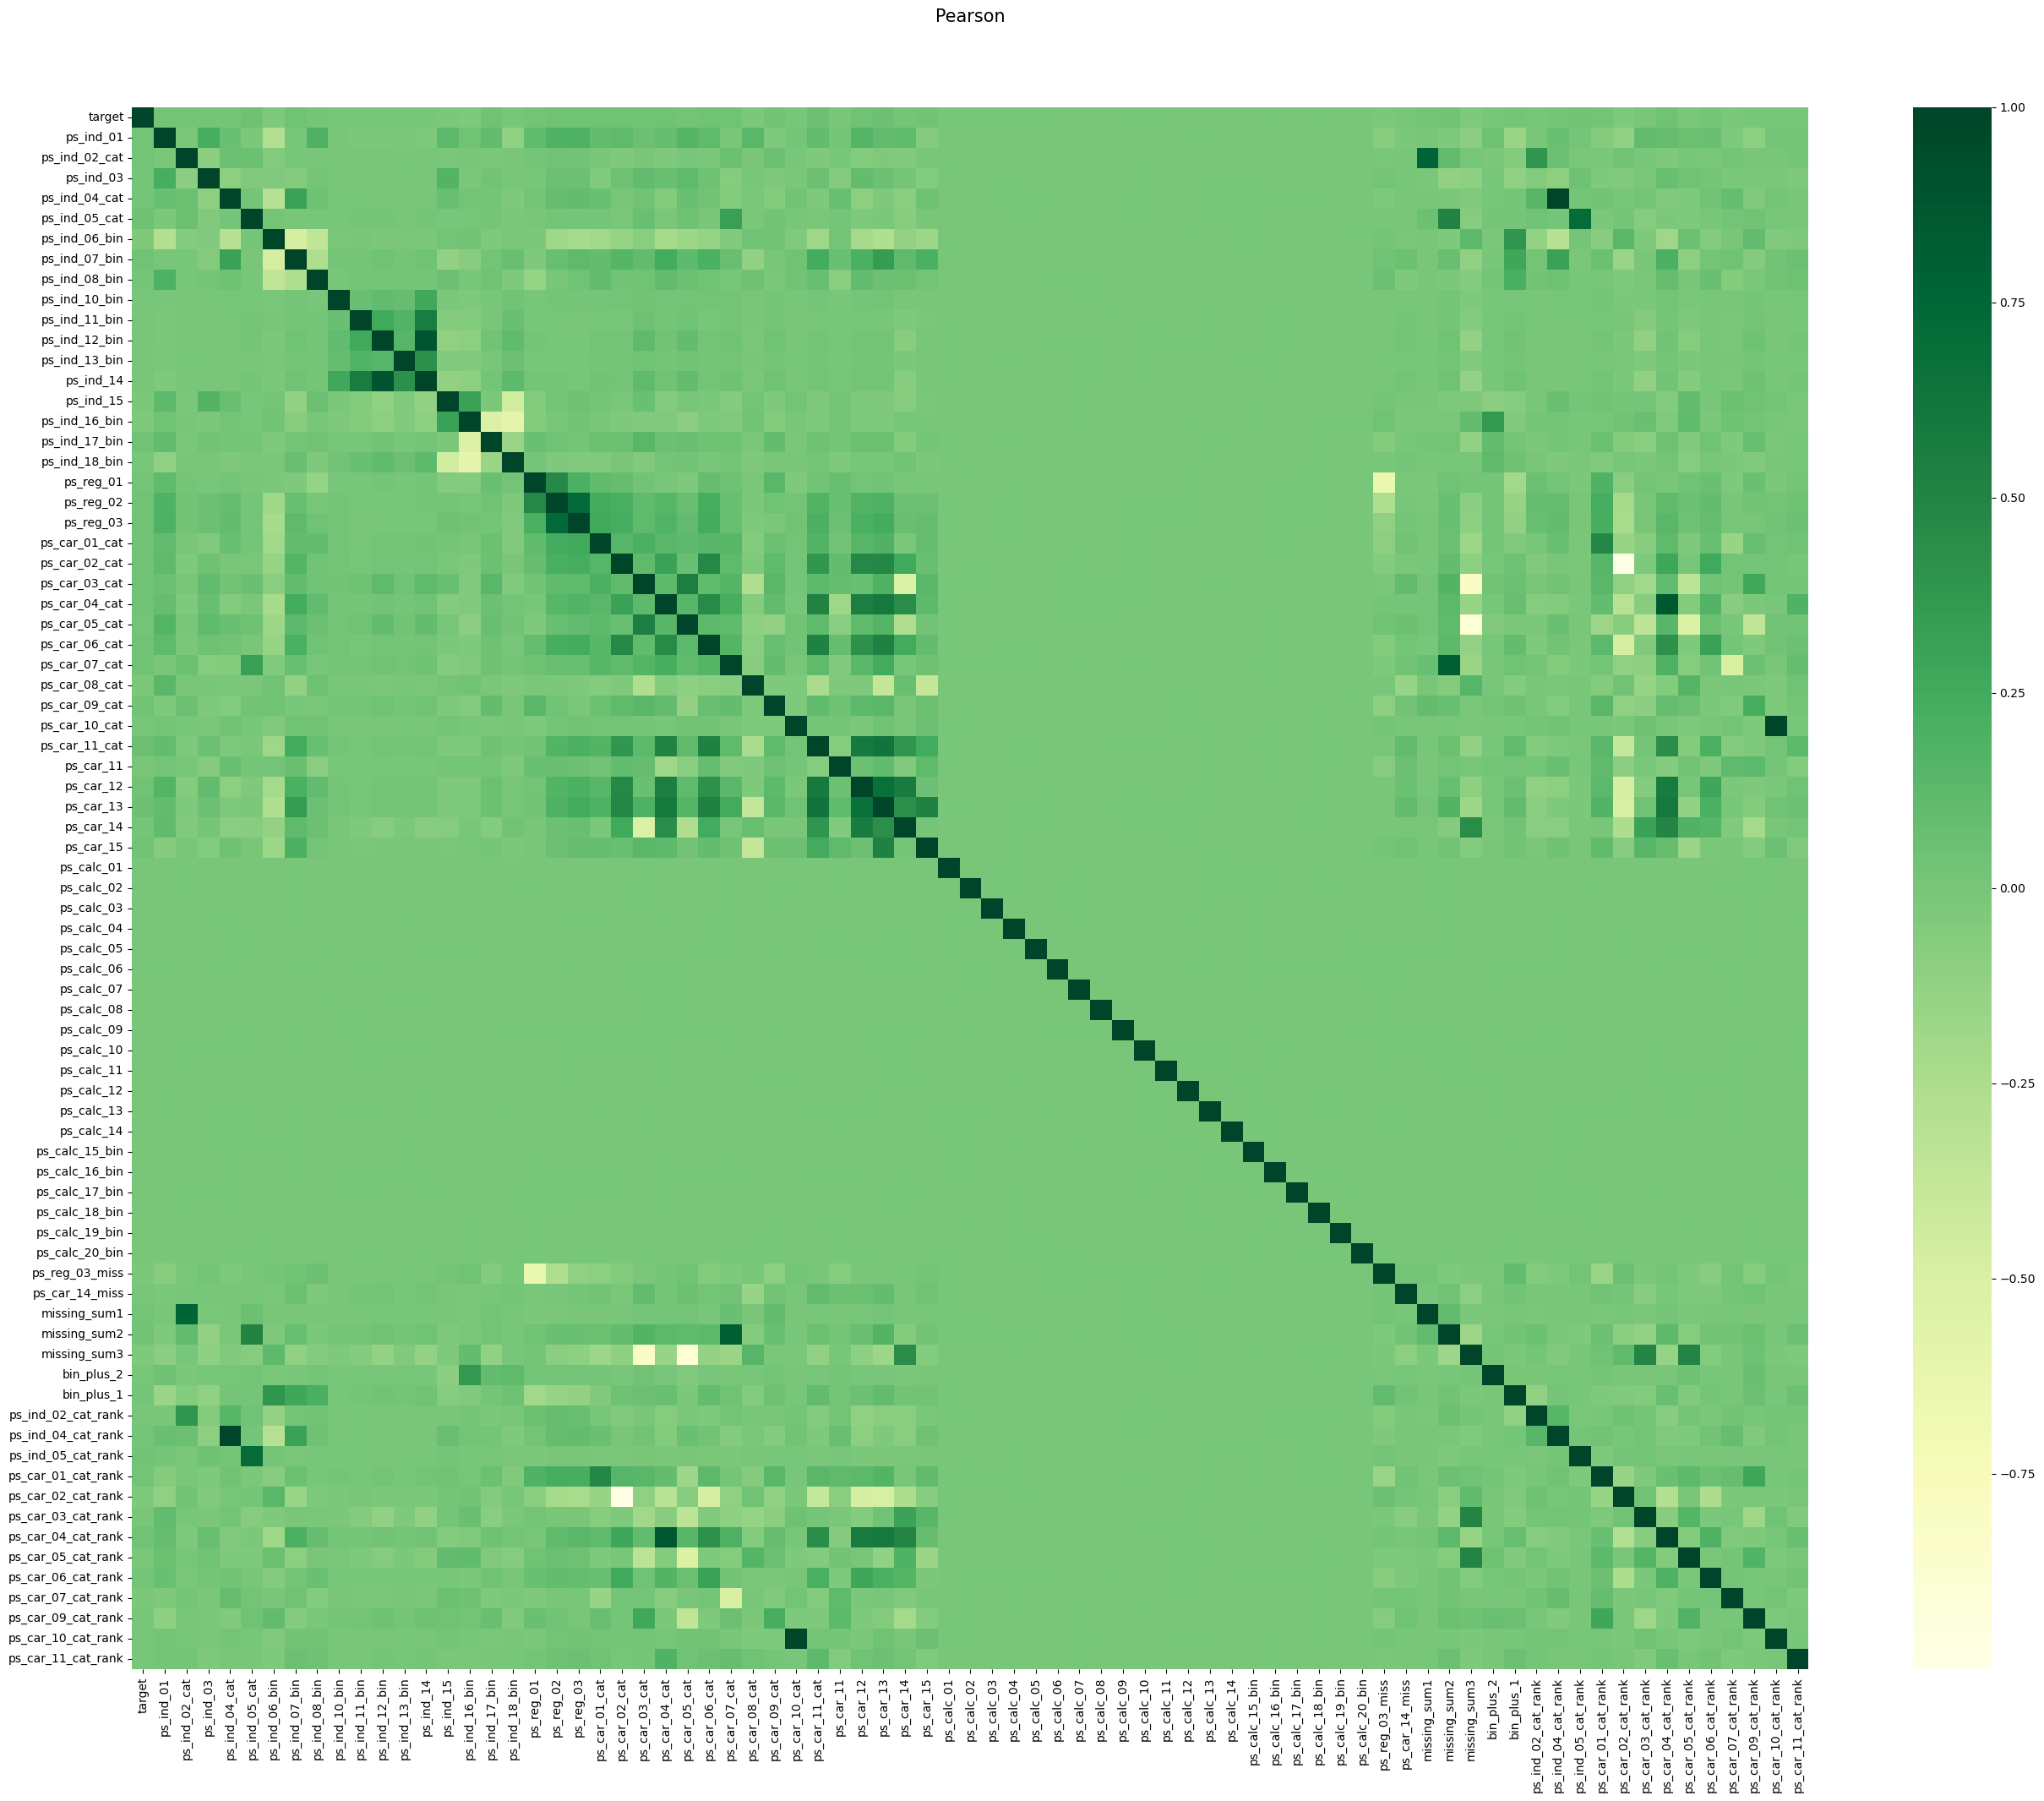

In [ ]:
# Plot the correlation coefficient matrix for all features of the entire training set
colormap = plt.cm.YlGn
plt.figure(figsize=(32,24))
plt.title(u'Pearson', y=1.05, size=15)
features = train.columns[1:]
sns.heatmap(train[features].corr(), cmap=colormap)

The effective information that can be obtained from the above figure is as follows:

1. Even after many feature projects, we can see that the features of the calc class are still the same as previously seen, and are not related to any other features.
2. After continuous processing, there is a certain positive correlation between the multi-class variables as a whole, and there is also a certain positive correlation between the multi-class variables and reg features.
3. ps_ind_04_Cat and ps_car_10_cat、ps_car_02_Cat, and the sequenced themselves, namely ps_ind_04_cat_Rank and ps_car_10_ cat_ rank，ps_car_02_cat_ There is a strong correlation between rank. In fact, it can be said that the whole cat feature area is related to cat_ There is a certain correlation between rank regions, which means that the order of feature values of these multi-classification features may be meaningful.
4. MissingTotal_1 and ps_ind_02_ There is a strong positive correlation between cats, MissingTotal_2 and ps_car_07_ There is a positive correlation between cat. Because MissingTotal is the sum of the number of missing values of multiple features (including the features related to it here), this may indicate that ps_ind_02_ The missing value of cat constitutes MissingTotal_1, MissingTotal_2 and ps_car_07_Cat is the same. And MissingTotal_3 and its two characteristics ps_car_03_Cat and ps_car_05_ It is easy to understand that cat has strong negative correlation, and there are many missing values for these two features.

## Eliminate features with different distribution between training set and test set

In most features, the distribution of training set and test set is very close. However, there are still several features with different distribution of values in the training set and test set, that is, ps_calc_06，ps_calc_12，ps_calc_13，ps_calc_14 These four characteristics. However, directly removing these features may lose information. We noticed that ps_calc_06 is less than 2, ps_calc_12 is greater than 6, ps_calc_13 is equal to 13, ps_calc_14 is equal to 19. These characteristics may have a significant impact on the conditional probability of target=1.
To retain this information, we set four new two-dimensional variable features:
- （1）ps_calc_06_bin:If the value of ps_calc_06 is less than 2, it is recorded as 1, otherwise it is 0.
- （2）ps_calc_12_bin:If the value of ps_calc_12 is greater than 6, it is recorded as 1, otherwise it is 0.
- （3）ps_alc_13_bin:When the value of ps_calc_13 is equal to 13, it is recorded as 1, otherwise it is 0.
- （4）ps_calc_14_bin:When the value of ps_calc_14 is equal to 19, it is recorded as 1, otherwise it is 0.

Then, cull the original features.

In [ ]:
train['ps_calc_06_bin'] = np.zeros(len(train))
train['ps_calc_12_bin'] = np.zeros(len(train))
train['ps_calc_13_bin'] = np.zeros(len(train))
train['ps_calc_14_bin'] = np.zeros(len(train))
train['ps_calc_06_bin'][train.ps_calc_06<2] += 1
train['ps_calc_12_bin'][train.ps_calc_12>6] += 1
train['ps_calc_13_bin'][train.ps_calc_13==13] += 1
train['ps_calc_14_bin'][train.ps_calc_14==19] += 1
test['ps_calc_06_bin'] = np.zeros(len(test))
test['ps_calc_12_bin'] = np.zeros(len(test))
test['ps_calc_13_bin'] = np.zeros(len(test))
test['ps_calc_14_bin'] = np.zeros(len(test))
test['ps_calc_06_bin'][test.ps_calc_06<2] += 1
test['ps_calc_12_bin'][test.ps_calc_12>6] += 1
test['ps_calc_13_bin'][test.ps_calc_13==13] += 1
test['ps_calc_14_bin'][test.ps_calc_14==19] += 1
# train=train.drop('ps_calc_06',axis = 1)
# train=train.drop('ps_calc_12',axis = 1)
# train=train.drop('ps_calc_13',axis = 1)
# train=train.drop('ps_calc_14',axis = 1)
# test=test.drop('ps_calc_06',axis = 1)
# test=test.drop('ps_calc_12',axis = 1)
# test=test.drop('ps_calc_13',axis = 1)
# test=test.drop('ps_calc_14',axis = 1)

In [ ]:
test.head(5)

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_10_bin,...,ps_car_05_cat_rank,ps_car_06_cat_rank,ps_car_07_cat_rank,ps_car_09_cat_rank,ps_car_10_cat_rank,ps_car_11_cat_rank,ps_calc_06_bin,ps_calc_12_bin,ps_calc_13_bin,ps_calc_14_bin
0,0,0,0.035725,8,0.038644,0.033865,0,1,0,0,...,1.0,1,1.0,2.0,1,65,0.0,0.0,0.0,0.0
1,1,4,0.038139,5,0.038644,0.033865,0,0,0,0,...,0.0,11,1.0,0.0,1,103,0.0,0.0,0.0,0.0
2,2,5,0.035725,3,0.034790,0.033865,0,0,0,0,...,1.0,14,1.0,2.0,1,29,0.0,0.0,0.0,0.0
3,3,0,0.035725,6,0.034790,0.033865,1,0,0,0,...,1.0,1,1.0,2.0,1,40,0.0,0.0,0.0,0.0
4,4,5,0.035725,7,0.034790,0.033865,0,0,0,0,...,1.0,11,1.0,2.0,1,101,0.0,0.0,0.0,0.0


## Modeling data using a combinatorial tree model

We innovatively use Random Forest and XGBoost models in this project because these two models, as combined tree models, have the ability to automatically select features, and the feature importance ranking they provide will help in the feature selection process.

In [ ]:
train[features].isnull().any()

target                False
ps_ind_01             False
ps_ind_02_cat         False
ps_ind_03             False
ps_ind_04_cat         False
                      ...  
ps_car_06_cat_rank    False
ps_car_07_cat_rank    False
ps_car_09_cat_rank    False
ps_car_10_cat_rank    False
ps_car_11_cat_rank    False
Length: 77, dtype: bool

### Using the random forest model

In [ ]:
##Attempted modeling with the goal of outputting feature importance
##1.RandomForest
from sklearn.ensemble import RandomForestClassifier

model_fe = RandomForestClassifier()
features = train.columns[2:]
model_fe.fit(train[features], train.target)

###Importance Ranking
importance = model_fe.feature_importances_
features_sort = features[np.argsort(importance)[::-1]]
importance_sort = importance[np.argsort(importance)[::-1]]
plt.figure(figsize = (20,20))
sorted_idx = np.argsort(importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, importance[sorted_idx[::-1]],color='r',align='edge')
plt.yticks(pos, features[sorted_idx[::-1]])

The above figure is a schematic diagram of the importance of the features that are the output of the random forest after sorting, from which we can see that ps_car_13 and ps_reg_03 are undoubtedly the two most important features. Previously has not been optimistic about the calc class features also have a lot of occupy a higher importance ranking on, while the previous word construction of ps_calc_06_bin, ps_calc_12_bin, ps_calc_13_bin, ps_calc_14_bin, MissingValue_1, MissingValue_2 and several other features basically do not contribute.

### Using the XGBoost model

In [ ]:
##2.XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
model_fe = XGBClassifier(    
                        n_estimators=70,
                        max_depth=6,
                        objective="binary:logistic",
                        subsample=.8,
                        min_child_weight=6,
                        colsample_bytree=.8,
                        scale_pos_weight=1.6,
                        gamma=10,
                        reg_alpha=8,
                        reg_lambda=1.3,
                     )
model_fe.fit(train[features],train.target)
###Importance Ranking
importance = model_fe.feature_importances_
features_sort = features[np.argsort(importance)[::-1]]
importance_sort = importance[np.argsort(importance)[::-1]]
plt.figure(figsize = (20,20))
sorted_idx = np.argsort(importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, importance[sorted_idx[::-1]],color='r',align='edge')
plt.yticks(pos, features[sorted_idx[::-1]])

As can be seen, the importance ranking of the XGBOOST model considers ps_ind_03 to be the most important feature, with ps_car_13 and ps_ind_05_cat coming second, while the feature importance of the XGBoost output has more features with very low contributions compared to the random forest, and unlike the importance feature ranking of the random forest output, XGBoost considers almost All the calc class features give little contribution, while MissingTotal_1 and MissingTotal_3 and bin_plus_1, which we constructed ourselves earlier, all have good feature importance.

Through modeling analysis, we obtained the importance ranking of the two models, and then we eliminated the features that had a low ranking of feature importance in both models.

In [ ]:
## Characteristics that will be removed due to low importance
useless_features = [
 'ps_car_04_cat_rank',
 'ps_car_02_cat',
 'ps_car_08_cat',
 'ps_car_03_cat_rank',
 'ps_car_10_cat_rank',
 'ps_ind_13_bin',
 'ps_calc_06_bin',
 'ps_calc_12_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'bin_plus_2',
 'ps_ind_14',
 'ps_car_02_cat_rank',
 'ps_ind_18_bin',
 'ps_calc_13_bin',
 'ps_car_14_miss',
 'ps_car_10_cat',
 'ps_calc_14_bin']

train = train.drop(useless_features,axis = 1)
test = test.drop(useless_features,axis = 1)

In [ ]:
train.shape

(595212, 63)

In [ ]:
test.shape

(892816, 62)

A total of 19 features were eliminated, and the remaining features were 62.

## Exclude strongly correlated features

After completing the vast majority of the feature engineering, the correlation coefficient matrix is once again drawn.

<AxesSubplot:title={'center':'Pearson'}>

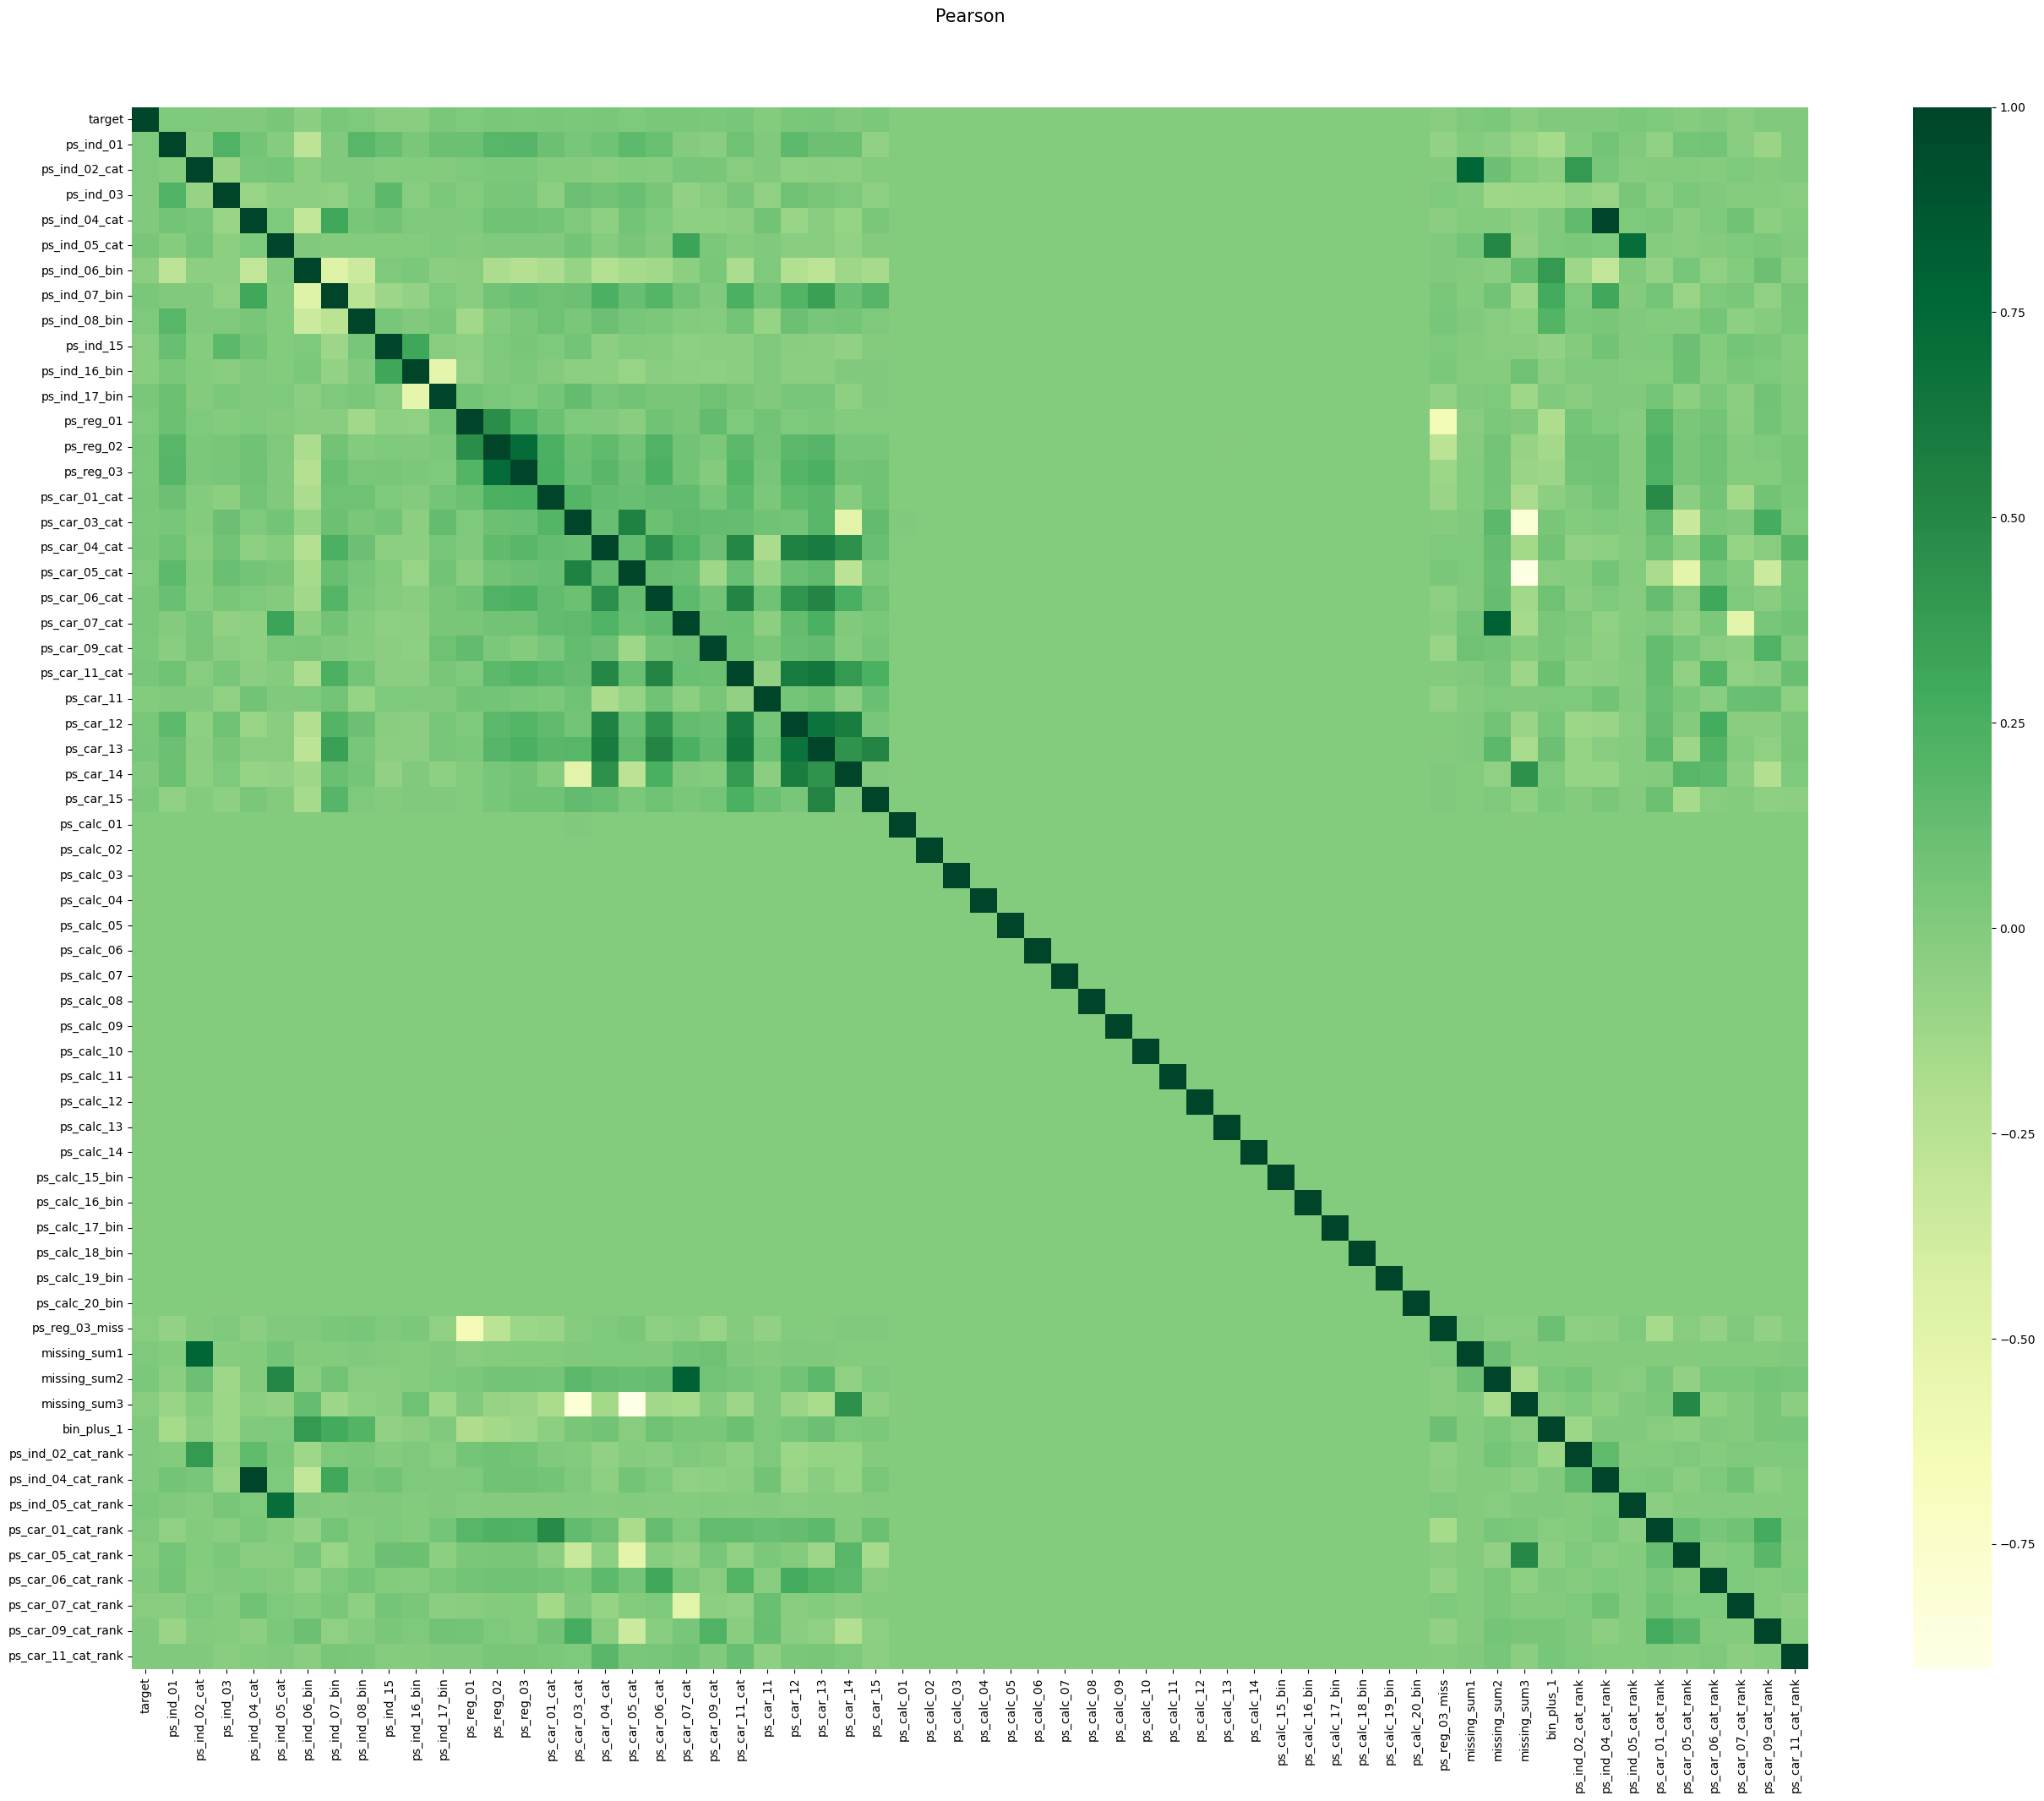

In [ ]:
# Plot the correlation coefficient matrix for all features of the entire training set
colormap = plt.cm.YlGn
plt.figure(figsize=(32,24))
plt.title(u'Pearson', y=1.05, size=15)
features = train.columns[1:]
sns.heatmap(train[features].corr(), cmap=colormap)

As we can see, after a few times of feature processing, the correlation between the more serious features is rare. reg and car-like features have some linear correlation regions, but the degree is acceptable.

Next, we have to deal with the remaining points with strong linear correlation: MissingTotal_3 has a strong negative correlation with both ps_car_03_cat and ps_car_05_cat, while MissingTotal_2 also has a strong positive correlation with ps_car_07, and in addition, ps_ind_04_cat has a strong positive correlation with There is also a strong positive correlation between ps_ind_04_cat_rank.

For this reason, we can choose to remove ind_04_cat_rank, ps_car_03_cat, missing_sum2, which appears to have a strong linear correlation and also performs poorly in the model feature scores:

In [ ]:
#Remove strong correlation features：
cor_features = ['ps_ind_04_cat_rank','ps_car_03_cat','missing_sum2']
train = train.drop(cor_features,axis = 1)
test = test.drop(cor_features,axis = 1)

## Data resampling

In the data understanding section, we find a high degree of imbalance in the training dataset, which we address here using the **data resampling** method.

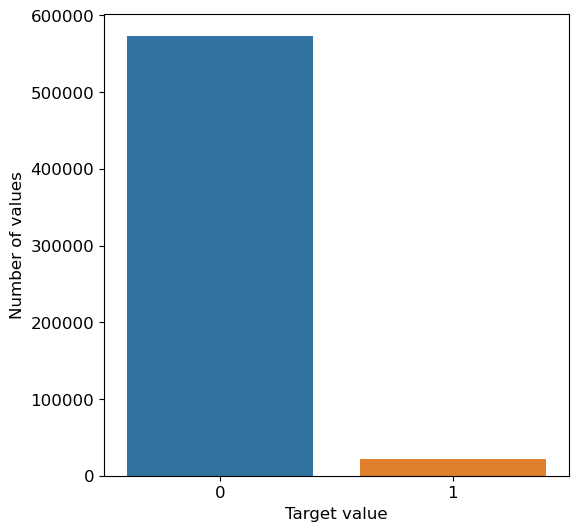

In [ ]:
# target analysis
import matplotlib.pyplot as plt
import seaborn as sns

target = train['target']

fig, ax = plt.subplots(figsize=(6,6))
x = train['target'].value_counts().index.values
y = train["target"].value_counts().values
# Bar plot
# Order the bars descending on target mean
sns.barplot(ax=ax, x=x, y=y)
plt.ylabel('Number of values', fontsize=12)
plt.xlabel('Target value', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

It can be seen that out of all 595212 training set samples, only 21694 samples have a target variable of 1. The remaining 573518 samples have a target variable value of 0.

Only 3.64% of the target data have a value of 1. This means that the training dataset is highly unbalanced. It indicates that this is a very unbalanced classification problem, which must be taken into account in the subsequent analysis and modeling process.

We can either undersample the records with target=0 or oversample the records with target=1; since it is a large dataset, we will undersample the records with target=0.

In [ ]:
# Undersampling of records with target=0
from sklearn.utils import resample

major_class     = train[train.target==0]
minority_class  = train[train.target==1]

down_class = resample(major_class,
                        replace=False,
                        n_samples=len(minority_class),
                        random_state=27)
downsampled_data = pd.concat([down_class, minority_class])

<AxesSubplot:title={'center':'Balanced Classes after upsampling.'}>

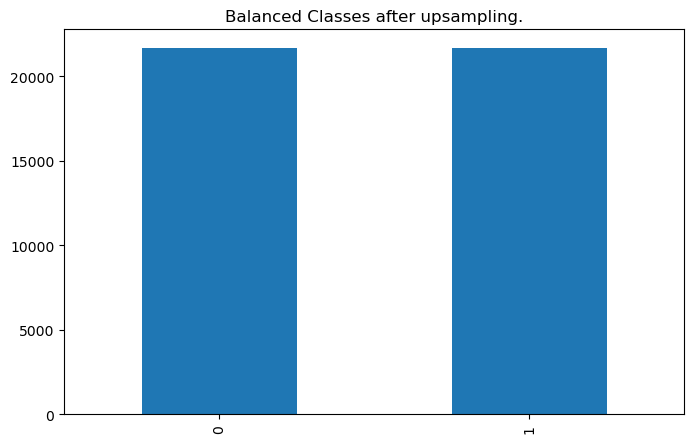

In [ ]:
plt.figure(figsize=(8, 5))
t='Balanced Classes after upsampling.'
downsampled_data.target.value_counts().plot(kind='bar', title=t)

In [ ]:
downsampled_data.shape

(43388, 60)

## Saving data

In [ ]:
downsampled_data.to_csv('train_planA.csv', index=False)

In [ ]:
downsampled_data['target'].value_counts()

0    21694
1    21694
Name: target, dtype: int64

## Feature Engineering Summary

At this point, we have completed the feature engineering and obtained the final data for modeling.

In [ ]:
import pandas as pd
train = pd.read_csv('train_planA.csv')
train.shape

(43388, 60)

# Model building and tuning
The following is the model building and tuning, which is the core part of this project, and we have completed 3 main items.
1. creation of baseline models using **PyCaret modeling tool**, respectively **XGBoost and LGB** models.
2. the integration of well-performing models using **Bagging, Boosting and Stack algorithms**, respectively.
3. finally perform a detailed tuning exploration work using the corresponding models in **sklearn**.

## Check the data

In [ ]:
import pandas as pd
train = pd.read_csv('train_planA.csv')

# Model fusion techniques
Based on the above exploratory analysis, we can use the model fusion technique to build the model.

## Importing Dependency Libraries

In [ ]:
from sklearn.utils import shuffle
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## Prepare the model
Then package the integrated model.

First, for cross-validation and integration, we prepare an Ensamble class to split the data in Kfold, train the model and record the results.

This class has an init method that takes 4 arguments (called when the Ensamble object is created):
- self - the object to be initialized
- n_splits - the number of cross-validation splits to use
- stacker - the model used to stack the predictions of the training base model
- base_models - the list of base models used in training

The second method, fit_predict, has four functions.
- Performing n_splits splits on the training data.
- running each of the collapsed base models.
- Performing predictions using each model.
- Integration of the results using the stack.

In [ ]:
class Ensemble(object):
    def __init__(self, n_splits, stacker, base_models):
        self.n_splits = n_splits  # Set the number of cross-validation folds
        self.stacker = stacker  # Two-layer model
        self.base_models = base_models  # Base Model List

    def fit_predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)

        folds = list(StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=666).split(X, y))

        S_train = np.zeros((X.shape[0], len(self.base_models)))
        S_test = np.zeros((T.shape[0], len(self.base_models)))
        for i, clf in enumerate(self.base_models):

            S_test_i = np.zeros((T.shape[0], self.n_splits))

            for j, (train_idx, test_idx) in enumerate(folds):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
                
                print ("Base model %d: fit %s model | fold %d" % (i+1, str(clf).split('(')[0], j+1))
                clf.fit(X_train, y_train)
                cross_score = cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc')
                print("[Gini]: %.5f" % (2 * cross_score.mean() - 1))
                y_pred = clf.predict_proba(X_holdout)[:,1]                

                S_train[test_idx, i] = y_pred
                S_test_i[:, j] = clf.predict_proba(T)[:,1]
            S_test[:, i] = S_test_i.mean(axis=1)

        results = cross_val_score(self.stacker, S_train, y, cv=3, scoring='roc_auc')
        results1 = 1.66 * results.mean() - 1
        print("Stacker score [Gini]: %.5f" % results1)

        self.stacker.fit(S_train, y)
        res = self.stacker.predict_proba(S_test)[:,1]
        return res

## Parameter settings
For the base model, we prepare three different **LightGBM** models and one **XGBoost** model.<br>
Each model was used for training data (using triple cross-validation).

In [ ]:
lgb_params = {}
lgb_params['learning_rate'] = 0.02
lgb_params['n_estimators'] = 650
lgb_params['max_bin'] = 10
lgb_params['subsample'] = 0.8
lgb_params['subsample_freq'] = 10
lgb_params['colsample_bytree'] = 0.8   
lgb_params['min_child_samples'] = 500
lgb_params['seed'] = 666


lgb_params2 = {}
lgb_params2['n_estimators'] = 1090
lgb_params2['learning_rate'] = 0.02
lgb_params2['colsample_bytree'] = 0.3   
lgb_params2['subsample'] = 0.7
lgb_params2['subsample_freq'] = 2
lgb_params2['num_leaves'] = 16
lgb_params2['seed'] = 666


lgb_params3 = {}
lgb_params3['n_estimators'] = 1100
lgb_params3['max_depth'] = 4
lgb_params3['learning_rate'] = 0.02
lgb_params3['seed'] = 666

## Initializing the models
After careful tuning work, we initialize the 3 basic models and the overlay model. For the basic model, we use the predefined parameters above.<br>
and initialize the stacking object with Ensamble.init.

In [ ]:
lgb_model1 = LGBMClassifier(**lgb_params)
lgb_model2 = LGBMClassifier(**lgb_params2)
lgb_model3 = LGBMClassifier(**lgb_params3)

log_model = LogisticRegression()

stack = Ensemble(n_splits=3,
        stacker = log_model,
        base_models = (lgb_model1, lgb_model2, lgb_model3))

## Model Prediction

In [ ]:
train = pd.read_csv('train_planA.csv')
target1=pd.read_csv('target_planB.csv')
test1 = test
test1['target']=target1

In [ ]:
y_predict = stack.fit_predict(train, target1, test1)

Base model 1: fit LGBMClassifier model | fold 1
[Gini]: 0.28090
Base model 1: fit LGBMClassifier model | fold 2
[Gini]: 0.44154
Base model 1: fit LGBMClassifier model | fold 3
[Gini]: 0.46930
Base model 2: fit LGBMClassifier model | fold 1
[Gini]: 0.12191
Base model 2: fit LGBMClassifier model | fold 2
[Gini]: 0.11992
Base model 2: fit LGBMClassifier model | fold 3
[Gini]: 0.13893
Base model 3: fit LGBMClassifier model | fold 1
[Gini]: 0.13666
Base model 3: fit LGBMClassifier model | fold 2
[Gini]: 0.12264
Base model 3: fit LGBMClassifier model | fold 3
[Gini]: 0.13789
Stacker score [Gini]: 0.27119


**predicted probabilities saving**
Finally, save the predicted probabilities as a csv file.

For each id in the test set, the probability of an insurance claim is predicted in the target column.

In [ ]:
submit = pd.DataFrame()
submit['id'] = test1['id']
submit['target'] = y_predict
submit.to_csv('stack1.csv', index=False)

# evaluation
Assessment model based on the Gini coefficient (tentative).

### Scoring Metrics

<p>This project will use **Normalized Gini Coefficient** as the evaluation criterion for the model.</p>

<p>During the scoring process, observations are ranked from the largest prediction to the smallest prediction. The predictions are used only to rank the observations; therefore, the relative magnitudes of the predictions are not used during scoring. The scoring algorithm then compares the cumulative proportion of positive class observations to a theoretical uniform proportion.</p>

<p>Gini coefficient: approximately 0 for random guesses to approximately 0.5 for perfect scores. theoretical maximum for discrete calculations is :
$$\frac{(1 - frac_{pos})}{2}.$$

**Geometric significance of the normalized Gini coefficient**

In [ ]:
predictions = [0.9, 0.3, 0.8, 0.75, 0.65, 0.6, 0.78, 0.7, 0.05, 0.4, 0.4, 0.05, 0.5, 0.1, 0.1]
actual = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
data = zip(actual, predictions)
sorted_data = sorted(data, key=lambda d: d[1])
sorted_actual = [d[0] for d in sorted_data]
print('The actual value of the predicted value after sorting in ascending order：', sorted_actual)

The actual value of the predicted value after sorting in ascending order： [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]


Text(0, 0.5, 'Cumulative Actual Values')

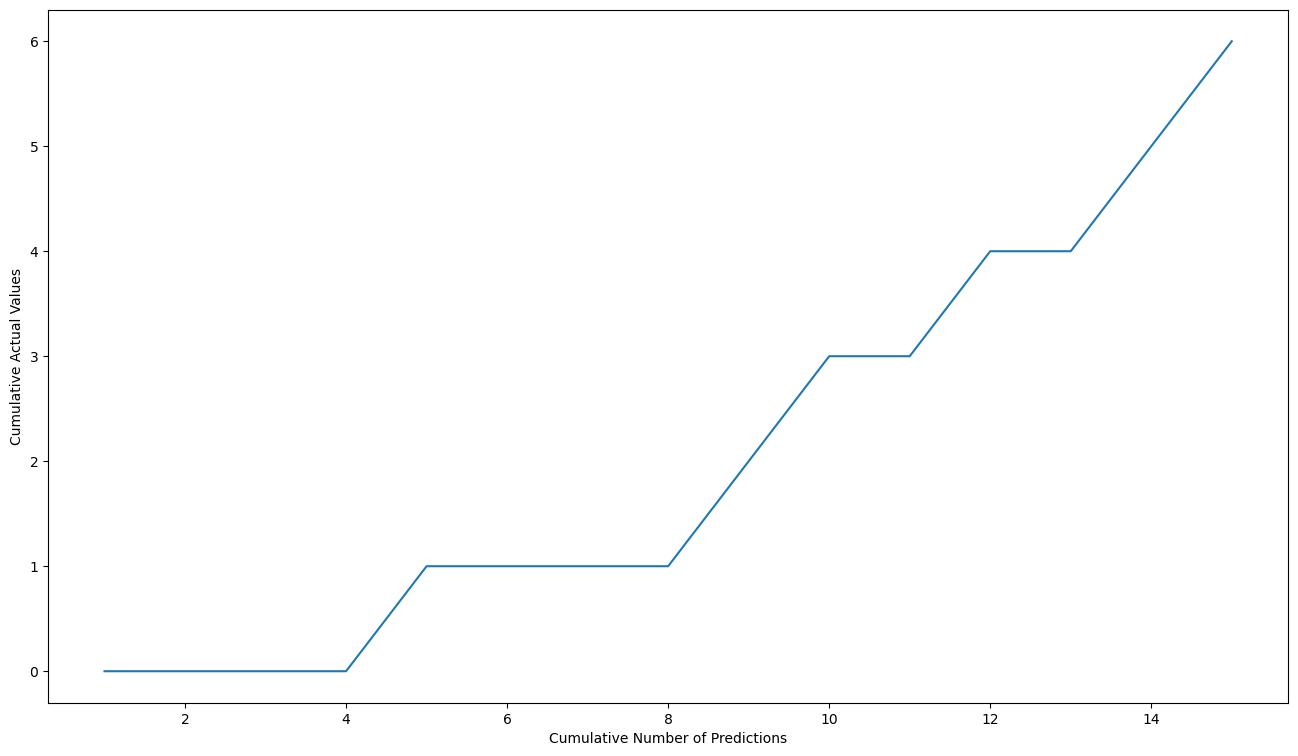

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
cumulative_actual = np.cumsum(sorted_actual)
cumulative_index = np.arange(1, len(cumulative_actual)+1)

plt.plot(cumulative_index, cumulative_actual)
plt.xlabel('Cumulative Number of Predictions')
plt.ylabel('Cumulative Actual Values')

Text(0, 0.5, 'Cumulative Share of Actual Values')

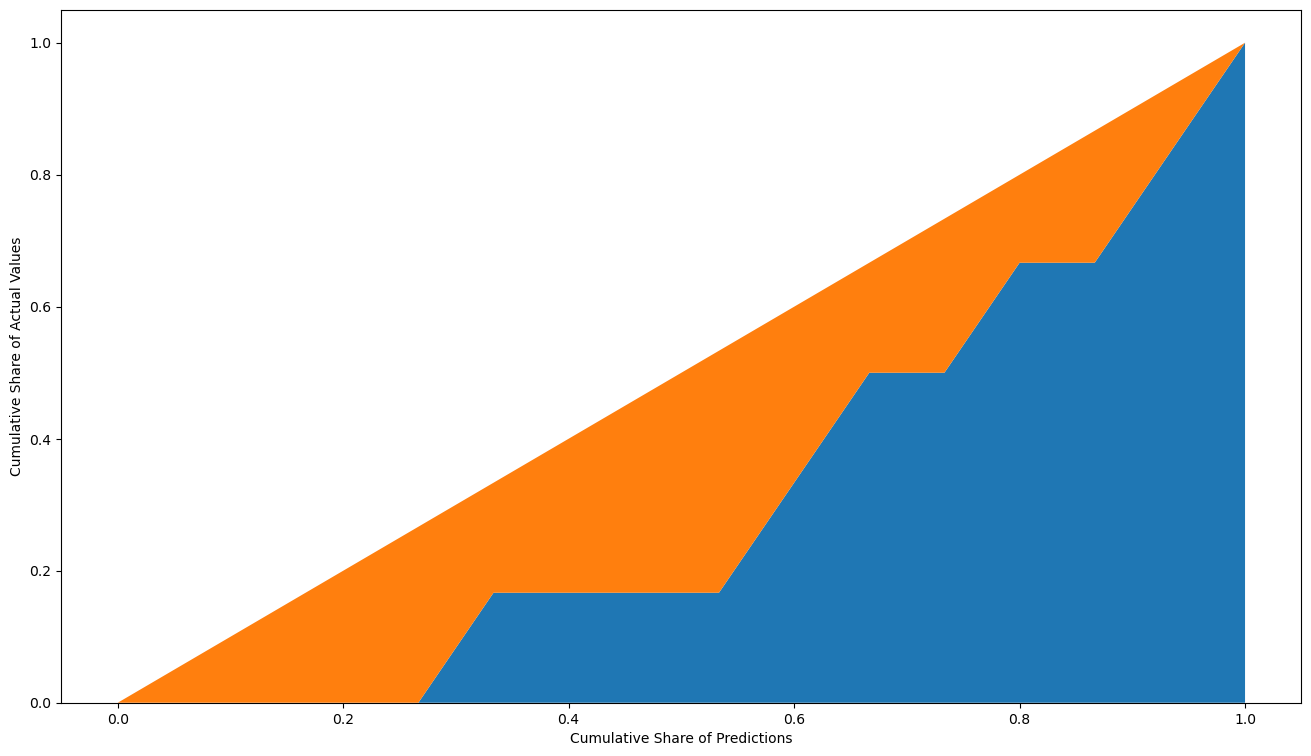

In [ ]:
# Normalization + color filling
# The orange area is the Gini coefficient
cumulative_actual_shares = cumulative_actual / sum(actual)
cumulative_index_shares = cumulative_index / len(predictions)

# Add (0, 0) to the plot
x_values = [0] + list(cumulative_index_shares)
y_values = [0] + list(cumulative_actual_shares)

# Display the 45° line stacked on top of the y values
diagonal = [x - y for (x, y) in zip(x_values, y_values)]

plt.stackplot(x_values, y_values, diagonal)
plt.xlabel('Cumulative Share of Predictions')
plt.ylabel('Cumulative Share of Actual Values')

The orange area in the figure above is the value of the normalized Gini coefficient.

In [ ]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [ ]:
gini_predictions = gini(actual, predictions)
gini_max = gini(actual, actual)
ngini= gini_normalized(actual, predictions)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.189, Max. Gini: 0.300, Normalized Gini: 0.630


**Gini coefficient characteristics:**
- The greater the probability uncertainty, the higher the Gini coefficient.
- The normalized Gini coefficient is, at worst, 0 and, at best, 1.

## Model running
In summary, we get two modeling ideas: the first is to use **XGBoost** models as **Stacker** and **BaseModel** to select 3 **LightGBM** models.<br>
The second one is to use **LR** models as Stacker, and BaseMode chooses 3 **LightGBM** models.

### Test 1
Model:<br>
**stacker**: **XGBoost** models，<br>
**base models**: **Three LightGBM** models.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier

# Regularized Greedy Forest  
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Preprocessing 
id_test = test['id'].values
target_train = train['target'].values

train = train.drop(['target','id'], axis = 1)
test = test.drop(['id'], axis = 1)


col_to_drop = train.columns[train.columns.str.startswith('ps_calc_')]
train = train.drop(col_to_drop, axis=1)  
test = test.drop(col_to_drop, axis=1)  


train = train.replace(-1, np.nan)
test = test.replace(-1, np.nan)


cat_features = [a for a in train.columns if a.endswith('cat')]

for column in cat_features:
    temp = pd.get_dummies(pd.Series(train[column]))
    train = pd.concat([train,temp],axis=1)
    train = train.drop([column],axis=1)
    
for column in cat_features:
    temp = pd.get_dummies(pd.Series(test[column]))
    test = pd.concat([test,temp],axis=1)
    test = test.drop([column],axis=1)


print(train.values.shape, test.values.shape)



class Ensemble(object):
    def __init__(self, n_splits, stacker, base_models):
        self.n_splits = n_splits  # Set the number of cross-validation folds
        self.stacker = stacker  # Two-layer model
        self.base_models = base_models  # Base Model List

    def fit_predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)

        folds = list(StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=666).split(X, y))

        S_train = np.zeros((X.shape[0], len(self.base_models)))
        S_test = np.zeros((T.shape[0], len(self.base_models)))
        for i, clf in enumerate(self.base_models):

            S_test_i = np.zeros((T.shape[0], self.n_splits))

            for j, (train_idx, test_idx) in enumerate(folds):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
                
                print ("Base model %d: fit %s model | fold %d" % (i+1, str(clf).split('(')[0], j+1))
                clf.fit(X_train, y_train)
                cross_score = cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc')
                print("[Gini]: %.5f" % (2 * cross_score.mean() - 1))
                y_pred = clf.predict_proba(X_holdout)[:,1]                

                S_train[test_idx, i] = y_pred
                S_test_i[:, j] = clf.predict_proba(T)[:,1]
            S_test[:, i] = S_test_i.mean(axis=1)

        results = cross_val_score(self.stacker, S_train, y, cv=3, scoring='roc_auc')
        print("Stacker score [Gini]: %.5f" % (2 * results.mean() - 1))

        self.stacker.fit(S_train, y)
        res = self.stacker.predict_proba(S_test)[:,1]
        return res


        
# LightGBM params
lgb_params = {}
lgb_params['learning_rate'] = 0.02
lgb_params['n_estimators'] = 650
lgb_params['max_bin'] = 10
lgb_params['subsample'] = 0.8
lgb_params['subsample_freq'] = 10
lgb_params['colsample_bytree'] = 0.8   
lgb_params['min_child_samples'] = 500
lgb_params['seed'] = 666


lgb_params2 = {}
lgb_params2['n_estimators'] = 1090
lgb_params2['learning_rate'] = 0.02
lgb_params2['colsample_bytree'] = 0.3   
lgb_params2['subsample'] = 0.7
lgb_params2['subsample_freq'] = 2
lgb_params2['num_leaves'] = 16
lgb_params2['seed'] = 666


lgb_params3 = {}
lgb_params3['n_estimators'] = 1100
lgb_params3['max_depth'] = 4
lgb_params3['learning_rate'] = 0.02
lgb_params3['seed'] = 666

xgb_params = {}
xgb_params['objective'] = 'binary:logistic'
xgb_params['learning_rate'] = 0.04
xgb_params['n_estimators'] = 490
xgb_params['max_depth'] = 4
xgb_params['subsample'] = 0.9
xgb_params['colsample_bytree'] = 0.9  
xgb_params['min_child_weight'] = 10
xgb_params['seed'] = 666



# RandomForest params
rf_params = {}
rf_params['n_estimators'] = 200
rf_params['max_depth'] = 6
rf_params['min_samples_split'] = 70
rf_params['min_samples_leaf'] = 30


# ExtraTrees params
et_params = {}
et_params['n_estimators'] = 155
et_params['max_features'] = 0.3
et_params['max_depth'] = 6
et_params['min_samples_split'] = 40
et_params['min_samples_leaf'] = 18


# XGBoost params
xgb_params = {}
xgb_params['objective'] = 'binary:logistic'
xgb_params['learning_rate'] = 0.04
xgb_params['n_estimators'] = 490
xgb_params['max_depth'] = 4
xgb_params['subsample'] = 0.9
xgb_params['colsample_bytree'] = 0.9  
xgb_params['min_child_weight'] = 10


# CatBoost params
cat_params = {}
cat_params['iterations'] = 900
cat_params['depth'] = 8
cat_params['rsm'] = 0.95
cat_params['learning_rate'] = 0.03
cat_params['l2_leaf_reg'] = 3.5  
cat_params['border_count'] = 8
cat_params['gradient_iterations'] = 4


# Regularized Greedy Forest params
rgf_params = {}
rgf_params['max_leaf'] = 2000
rgf_params['learning_rate'] = 0.5
rgf_params['algorithm'] = "RGF_Sib"
rgf_params['test_interval'] = 100
rgf_params['min_samples_leaf'] = 3 
rgf_params['reg_depth'] = 1.0
rgf_params['l2'] = 0.5  
rgf_params['sl2'] = 0.005


lgb_model = LGBMClassifier(**lgb_params)

lgb_model2 = LGBMClassifier(**lgb_params2)

lgb_model3 = LGBMClassifier(**lgb_params3)
        
xgb_model = XGBClassifier(**xgb_params)

log_model = LogisticRegression()
        
stack = Ensemble(n_splits=3,
        stacker = xgb_model,
        base_models = (lgb_model, lgb_model2, lgb_model3))        
        
y_pred = stack.fit_predict(train, target_train, test)        

sub = pd.DataFrame()
sub['id'] = id_test
sub['target'] = y_pred
sub.to_csv('lgb_tri_and_xgb.csv', index=False)

Score [Gini coefficient]: $0.28085$

### Test 2

Model:<br>
**stacker**: **LogisticRegression** models<br>
**base models**: **Three LightGBM** models.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier

# Regularized Greedy Forest  
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Preprocessing 
id_test = test['id'].values
target_train = train['target'].values

train = train.drop(['target','id'], axis = 1)
test = test.drop(['id'], axis = 1)


col_to_drop = train.columns[train.columns.str.startswith('ps_calc_')]
train = train.drop(col_to_drop, axis=1)  
test = test.drop(col_to_drop, axis=1)  


train = train.replace(-1, np.nan)
test = test.replace(-1, np.nan)


cat_features = [a for a in train.columns if a.endswith('cat')]

for column in cat_features:
    temp = pd.get_dummies(pd.Series(train[column]))
    train = pd.concat([train,temp],axis=1)
    train = train.drop([column],axis=1)
    
for column in cat_features:
    temp = pd.get_dummies(pd.Series(test[column]))
    test = pd.concat([test,temp],axis=1)
    test = test.drop([column],axis=1)

print(train.values.shape, test.values.shape)


class Ensemble(object):
    def __init__(self, n_splits, stacker, base_models):
        self.n_splits = n_splits  # Set the number of cross-validation folds
        self.stacker = stacker  # Two-layer model
        self.base_models = base_models  # Base Model List

    def fit_predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)

        folds = list(StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=666).split(X, y))

        S_train = np.zeros((X.shape[0], len(self.base_models)))
        S_test = np.zeros((T.shape[0], len(self.base_models)))
        for i, clf in enumerate(self.base_models):

            S_test_i = np.zeros((T.shape[0], self.n_splits))

            for j, (train_idx, test_idx) in enumerate(folds):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
                
                print ("Base model %d: fit %s model | fold %d" % (i+1, str(clf).split('(')[0], j+1))
                clf.fit(X_train, y_train)
                cross_score = cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc')
                print("[Gini]: %.5f" % (2 * cross_score.mean() - 1))
                y_pred = clf.predict_proba(X_holdout)[:,1]                

                S_train[test_idx, i] = y_pred
                S_test_i[:, j] = clf.predict_proba(T)[:,1]
            S_test[:, i] = S_test_i.mean(axis=1)

        results = cross_val_score(self.stacker, S_train, y, cv=3, scoring='roc_auc')
        print("Stacker score [Gini]: %.5f" % (2 * results.mean() - 1))

        self.stacker.fit(S_train, y)
        res = self.stacker.predict_proba(S_test)[:,1]
        return res
    
lgb_params = {}
lgb_params['learning_rate'] = 0.02
lgb_params['n_estimators'] = 650
lgb_params['max_bin'] = 10
lgb_params['subsample'] = 0.8
lgb_params['subsample_freq'] = 10
lgb_params['colsample_bytree'] = 0.8   
lgb_params['min_child_samples'] = 500
lgb_params['seed'] = 666


lgb_params2 = {}
lgb_params2['n_estimators'] = 1090
lgb_params2['learning_rate'] = 0.02
lgb_params2['colsample_bytree'] = 0.3   
lgb_params2['subsample'] = 0.7
lgb_params2['subsample_freq'] = 2
lgb_params2['num_leaves'] = 16
lgb_params2['seed'] = 666


lgb_params3 = {}
lgb_params3['n_estimators'] = 1100
lgb_params3['max_depth'] = 4
lgb_params3['learning_rate'] = 0.02
lgb_params3['seed'] = 666

lgb_model = LGBMClassifier(**lgb_params)
lgb_model2 = LGBMClassifier(**lgb_params2)
lgb_model3 = LGBMClassifier(**lgb_params3)

log_model = LogisticRegression()
        
stack = Ensemble(n_splits=3,
        stacker = log_model,
        base_models = (lgb_model, lgb_model2, lgb_model3))        
        
y_pred = stack.fit_predict(train, target_train, test)        

sub = pd.DataFrame()
sub['id'] = id_test
sub['target'] = y_pred
sub.to_csv('lgb_tri_and_log.csv', index=False)

Score [Gini coefficient]:$0.28458$

# Conclusion

The model was built to predict whether a motor insurance policyholder would make an insurance claim in the following year. More accurate predictions will facilitate the company making further adjustments to insurance prices in the future and hopefully get more motorists to take out car insurance.The Gini coefficient obtained after running the model shows that a smaller coefficient value indicates a higher purity of the data. In this study, the XGBoost model and the LR model were modeled and run separately, and the value of the Gini index was maintained at 0.28 indicating a high stability of the model, and the likelihood of making an insurance claim in the next year was maintained in equilibrium with this year, and the auto company would make a judgment on the increase or decrease of the insurance rate based on the prediction results.